# Линейные модели классификации

Далее нам потребуется вспомнить некоторые основные понятия из курса математики. Кратко они будут описаны в данном разделе. Более подробно можно почитать в [дополнительных материалах](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G?hl=ru#scrollTo=OXZed9NEynaD).


Нам потребуются следующие понятия: 
1. [Векторы и операции над ними](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=gA45eUPC45b_).
2. [Скалярное произведение двух векторов](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=OXZed9NEynaD).
3. [Уравнение прямой на плоскости, гиперплоскость](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1qeoxXvxWgZm).
4. [Элементы математической статистики](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC): математическое ожидание, дисперсия, стандартное отклонение.

## Пример на понимание концепции построения разделяющей гиперплоскости



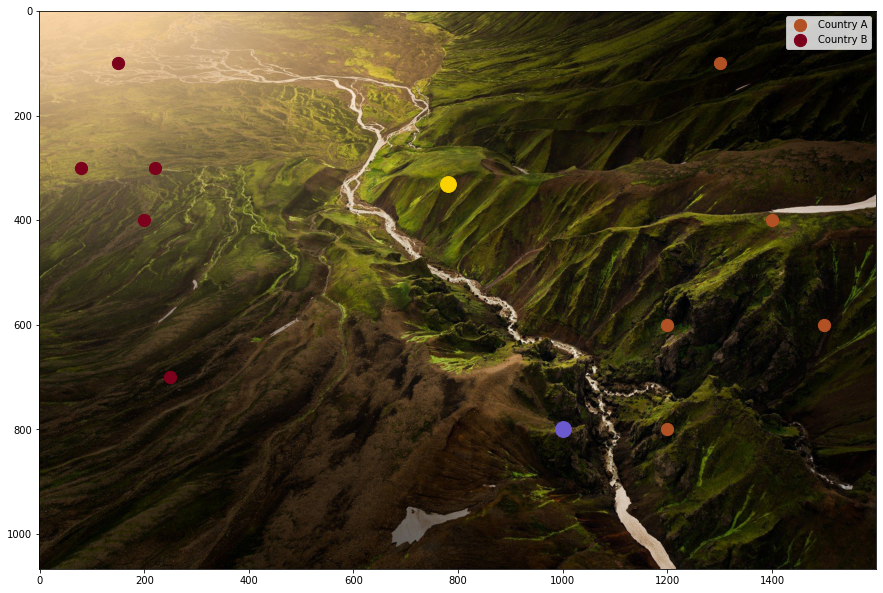

Вспомним пример с ресторанами: там мы определяли принадлежность к некоторому классу по принципу наименьшего расстояния до объектов этого класса. Рассмотрим теперь немного другой вариант этой задачи: пусть нам дана карта с отмеченными населенными пунктами страны А и страны B на ней, как на изображении выше. Наша задача состоит в том, чтобы понять, к какой из стран скорее всего принадлежат желтая и фиолетовая точки.

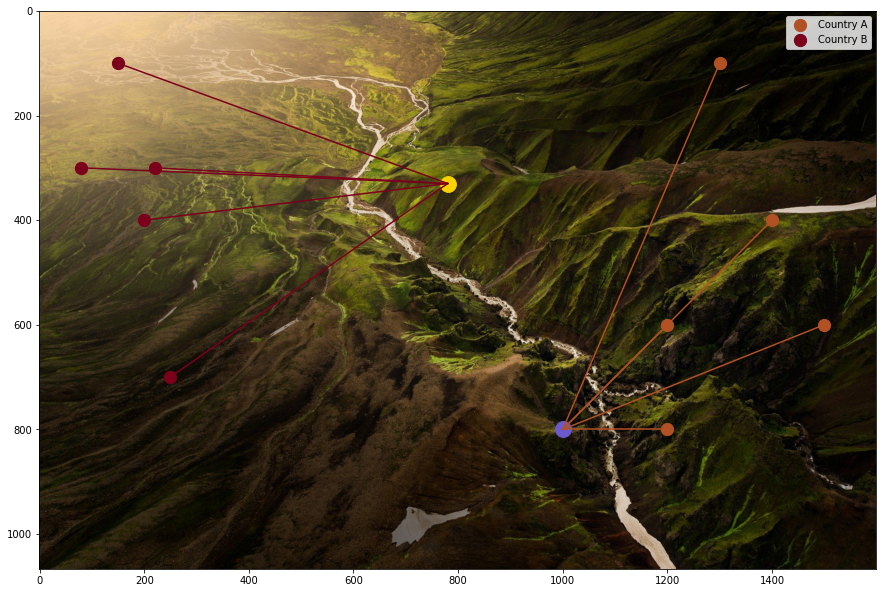

С точки зрения метрических алгоритмов, разделение следующее: желтая точка относится к классу B, поскольку лежит ближе к нему, а фиолетовая - к A. Но что-то нас в такой классификациии не устраивает: мы видим на карте реку и некоторую закономерность - города страны А лежат на правом берегу реки, а города страны B - на левом. Это дает нам повод предположить, что алгоритм классификации здесь строится совершенно иначе, а граница стран на самом деле проходит вдоль реки. Тогда правильным алгоритмом классификации будет алгоритм, оценивающий, с какой стороны от разделяющей линии (в нашем случае - реки) лежит данный объект.

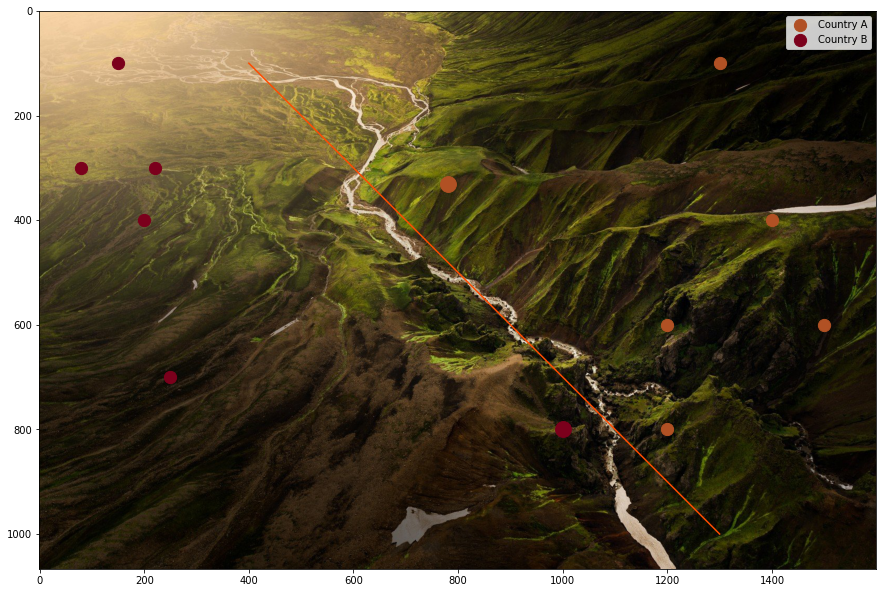

Таким образом, мы придумали принципиально новую схему анализа в задаче классификации - построение **разделяющих поверхностей**, которые будут границами классов.

# Обобщённый линейный классификатор

Идея обобщенного линейного классификатора состоит в том, что в качестве таких границ мы будем брать некоторые линейные поверхности, или, как их еще называют, [**гиперплоскости**](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1qeoxXvxWgZm).

Напомню, что линейными называются такие поверхности, которые могут быть заданы в виде линейного уравнения. В простейшем случае это просто прямая: $$y = kx + b $$ Или, как то же уравнение записали бы математики: $$Ax + By + C = 0$$
Почему я сказал, что этот случай простейший? Все дело в том, что переменных здесь у нас всего 2, то есть мы работаем на плоскости. Но то же уравнение может быть записано и для большего числа переменных: 3, 4 и вообще сколько нам захочется. В общем виде оно будет выглядеть так: $$w_1{x_1} + w_2{x_2} + w_3{x_3} + ... + w_N{x_N} + {w_0} = 0$$

Множество тех точек $x$, для которых это уравнение выполнено, можно нарисовать в $N$-мерной плоскости, и оно задаст нам некоторую поверхность. Сказать, что это конкретно будет за поверхность, мы сможем только подобрав коэффициенты ${w_0}, {w_1} ... {w_N}$.

В двумерном случае эта поверхность будет некоторой прямой, в трехмерном - плоскостью, более высокие размерности людям очень сложно себе представить. Именно поэтому мы с вами будем брать в качестве иллюстрации именно двумерный случай.

В двумерном случае логика действительно простая:
одно множество точек от другого можно отделить при помощи прямой. Но прямые бывают разные, какие-то будут справляться с этой задачей лучше, чем другие. Наша цель - как раз отыскать **самую лучшую** прямую.



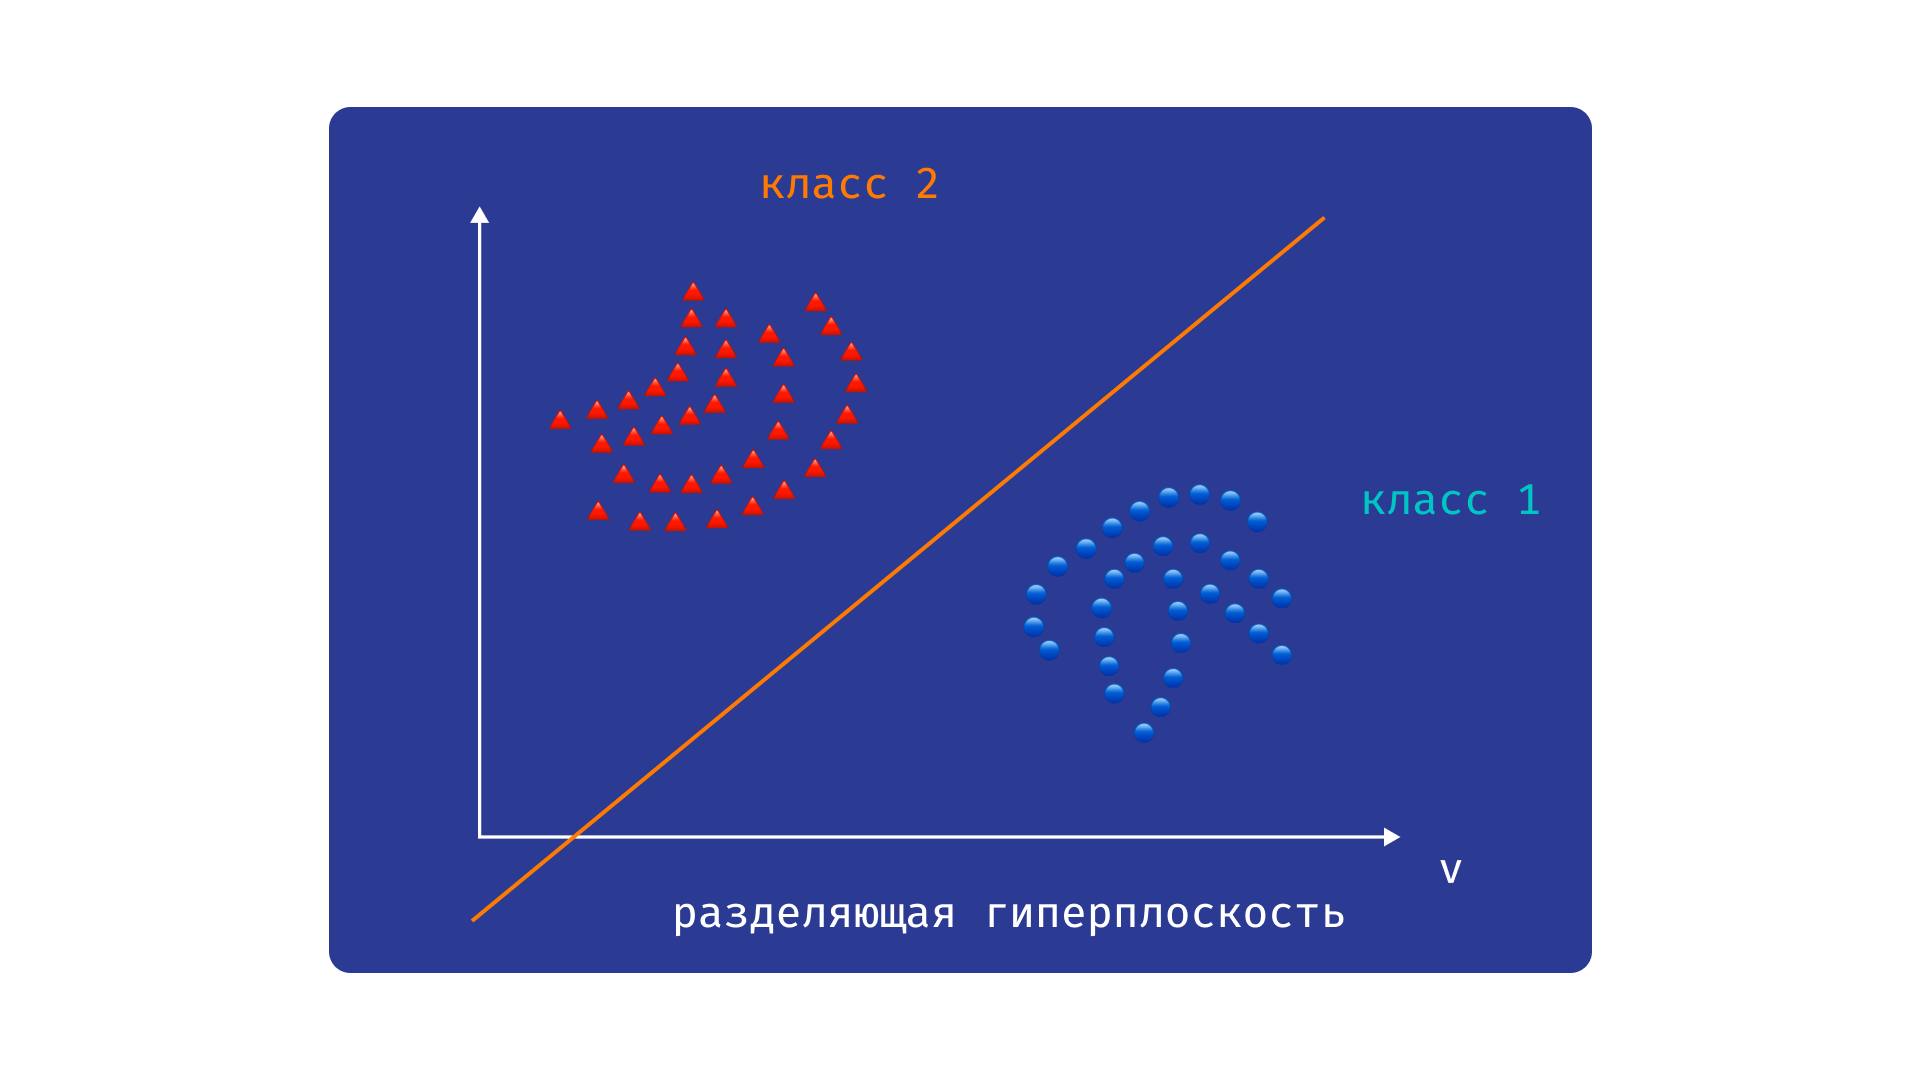

Что значит самую лучшую?
И как формально поставить эту задачу?

Приготовьтесь, сейчас будет математика!

I. Думаю, многие из вас помнят со школы или первого курса, что такое [скалярное произведение](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=OXZed9NEynaD). Математики, программисты и физики знают про этот объект очень много интересного :)

Давайте напомню: если у нас с вами есть два [вектора](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) $$\vec{x} = (x_1, ... , x_N) \in R^N$$ $$\vec{y} = (y_1, ... , y_N) \in R^N$$ то их (евклидовым) скалярным произведением называется $(\vec{x},\vec{y}) = x_{1}y_{1} + x_{2}y_{2} = ∑x_{i}y_{i}$. 

Тогда уравнение прямой на плоскости можно записать в виде $w_1{x_1} + w_2{x_2} + w_0 = 0$ (если заменить $x$ на $x_1$, а $y$ на $x_2$ в формуле прямой на плоскости $y = kx + b $).

Или, что то же самое, $$(\vec{w},\vec{x}) + {w_0} = 0$$

Вектор $\vec{w}$ называют вектором **параметров нашей модели**, а иногда - **вектором весов**.
Именно он и задаёт конкретную прямую, которую мы будем использовать для отделения одного класса от другого. То есть выбрать конкретную прямую значит выбрать **конкретный вектор параметров $\vec{w}$ и значение $w_0$**. Наша задача состоит ровно в том, чтобы найти эти $\vec{w}$ и $w_0$

II. Вспомним интересную деталь, связанную с уравнением прямой: пусть прямая задается уравнением $f_w(x) = (\vec{w},x) + {w_0} = 0$. Тогда знак функции $f_w$ будет меняться следующим образом:

1) Если $x'$ лежит на прямой, $f_w$($x'$) = 0

2) Если $x''$ лежит по одну сторону от прямой (условно - справа), то  $f_w$($x''$) > 0

3) Если $x'''$ лежит по другую сторону от прямой (условно - слева), то $f_w$($x'''$) < 0

То есть нам не обязательно смотреть глазами на построенную прямую, можно вообще отвлечься от факта, что наша модель - прямая. Просто теперь мы имеем вполне определенный алгоритм классификации:

Если точка x лежит слева от прямой, то $f_w$($x''$) < 0 - отнесем ее к классу 0.
А если точка x лежит справа от прямой, то $f_w$($x''$) > 0 - отнесем ее к классу 1.

Последняя проблема, которая стоит перед нами, - это поиск самого лучшего набора параметров для классификации имеющегося датасета.


Замечание:

Сейчас мы обсуждаем модельный пример задачи, когда существует такая гиперплоскость, способная разделить нашу [выборку](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC) на 2 класса. Вообще-то существование такой гиперплоскости нам никто не обещает. Выборки, для которых такая гиперплоскость существует, называются **линейно разделимыми**.

Если выборка не является линейно разделимой, линейный классификатор не даст идеальный результат, но может дать достаточно хороший.

# Проблема оптимизации

Из каких соображений искать этот вектор параметров?

Прежде чем ответить на этот вопрос, сделаем еще пару интересных наблюдений:

- Несложно придумать функцию, которая будет показывать ошибку нашей модели:
$$ M(f_w, x, y) = [f_w(x) = y] $$
Такая функция называется индикатором, и она возвращает 0, когда условие в квадратных скобках не выполнено, и 1, когда выполнено.

- Но уже сложнее оценить, насколько сильно ошиблась наша модель. Ведь случай, когда прямая прошла очень далеко от анализируемой точки, отправив ее в неправильный класс, очень отличается от случая, когда она прошла совсем близко к этой точке. Нам бы хотелось отдавать предпочтения тем моделям, которые делают **уверенные** предсказания, если они верны, и **неуверенные**, если они неверны.

Представьте, что Вы - учитель, и Вы задаете ученикам сложный вопрос. Один из учеников сразу дал неправильный ответ с уверенным видом, второй же - тоже дал неправильный ответ, но пытался размышлять и сомневался в своем неверном ответе. Вы же отдадите предпочтение второму, даже несмотря на то, что оба дали неверный ответ на вопрос.

То есть нам недостаточно иметь оценку ошибки лишь в виде ее индикатора. Нам хочется понять, насколько сильно наша модель заблуждается в своих решениях.

- Для этого мы воспользуемся следующей идеей:
 геометрически уверенность модели можно трактовать как расстояние от точки до прямой, которую мы используем для классификации. Если точка далеко от прямой - уверенность модели высока, а если близко - модель неуверенна. Как же оценить это расстояние?

 Оказывается, при помощи все той же функции $f_w(x)$! Ее знак показывает положение точки относительно прямой, но ее модуль - показывает, как далеко эта точка от прямой находится.

 - Пусть метки классов, с которыми мы работаем, задаются именно в виде +1 и -1. Тогда выражение $M_i(\vec{w}, w_0) = f_w(x_i)*y_i$ будет положительным тогда и только тогда, когда классификация верна, а его модуль покажет нам уверенность модели!

 Разберемся подробнее:
 * Пусть $y_i$ = +1. Тогда модель сделала верное предсказание, если $f_w(x_i) > 0$, а неверное, если - $f_w(x_i) < 0$. Тогда, умножив, $y_i$ на $f_w(x_i)$ мы получим положительное число, только если $f_w(x_i) > 0$, то есть классификация верная. Полученное значение же будет пропорционально уверенности модели в своей верной классификации, как мы выяснили в предыдущем пункте.

* И наоборот: Пусть $y_i$ = -1. Тогда модель сделала верное предсказание, если $f_w(x_i) < 0$, а неверное, если - $f_w(x_i) > 0$. Умножение на $y_i = -1$ даст нам положительный результат в случае верной классификации и отрицательный - в случае неверной. Само же значение опять показывает уверенность модели в своем ответе.

Значит, мы хотим, чтобы $M_i(w, w_0)$ был как можно больше!
Эта функция называется **отступом**. И наша задача - максимизировать средний отступ по всему нашему датасету!

Именно исходя из этого соображения мы должны подбирать параметры модели. Таким образом, мы свели задачу бинарной классификации к задаче оптимизации, то есть поиска минимума или максимума некоторой функции. О том, как решаюся такие задачи в машинном обучении, мы поговорим на одном из следующих занятий.



Мы рассмотрим два специальных типа такого подхода. 

# SVM (support vectors machine, метод опорных векторов)

Мы можем требовать от наших гиперплоскостей некоторых дополнительных свойств. Скажем, мы хотим, чтобы классификация была как можно более уверенной. Это значит, что минимальное [расстояние](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BQYo5PC3B_jZ) между объектом каждого из классов и проведенной гиперплоскостью должно быть как можно больше, ведь, как мы выяснили, именно это расстояние является формальным эквивалентом "уверенности". Представим себе полосу, ограниченную двумя гиперплоскостями, параллельными разделяющей гиперплоскости, отвечающую двум требованиям:

- Внутрь этой полосы не попало ни одного объекта (предположим для начала, что выборка линейно разделима, тогда это возможно).

- Границы этой полосы настолько близки к объектам обоих классов, насколько это только возможно (то есть если мы совсем немного увеличим ширину этой полосы, какой-то объект обязательно попадёт внутрь).

- Построенная разделяющая гиперплоскость находится ровно в середине этой полосы.

Приведённый рисунок иллюстрирует данную модель.

В нашем случае требование максимальной уверенности классификации значит, что мы хотим построить такую прямую, чтобы **ширина полосы, отделяющей один класс от другого была максимально возможной**.



Это абсолютно естественное требование, ведь мы хотим, чтобы минимальный отступ, который мы рассматривали в прошлом параграфе, то есть расстояние от разделяющей гиперплоскости до ближайшего объекта из выборки, был как можно больше - в этом случае классификация будет наиболее уверенной.
Это требование можно записать в виде математической постановки задачи оптимизации. Эта постановка в виде системы уравнений и неравенств достаточно громоздкая, ее изучение лежит за пределами нашего курса.

Перейдем сразу к рассмотрению решения этой проблемы. 

В результате решения задачи квадратического программирования мы имеем набор коэффициентов $λ_i$ и решающее правило:
$$a(x) = sign\big{[}∑\lambda_iy_i(x_i,x) - ∑λ_iy_i(x_i,x_j) - y_i\big{]}$$

(Где $j$ - это индекс объекта, для которого $λ_j$>0 и $M_j$=1).
В данном случае ${x_i}$ - это $i$-й объект из нашей выборки, ${y_i}$ - это метка этого объекта, а $λ_i$ - набор коэффициентов, полученных при аналитическом решении задачи оптимизации. Функция $y=sign(x)$ - [функция знака](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=ryutVBXiDzx3) (signum).

Именно такой классификатор при условии верно подобранного набора чисел $λ_i$ дает нам нужное решающее правило, максимизирующее ширину полосы.

Для максимизации ширины полосы нам, по факту, не нужно знать никакой информации об объектах, лежащих от этой полосы очень уж далеко. Одним словом нам нужно что-то знать лишь про те объекты, которые лежат **на границе** этой самой оптимальной полосы. Формально это значит, что многие коэффициенты $λ_j$ буду равны нулю, и лишь некоторые из них, привязанные к объектам, лежащим на границе полосы, будут отличны от нуля. Такие объекты как раз и называются **опорными векторами**.

Сложно?
Ничего, рассмотрим работу этого алгоритма на примере.



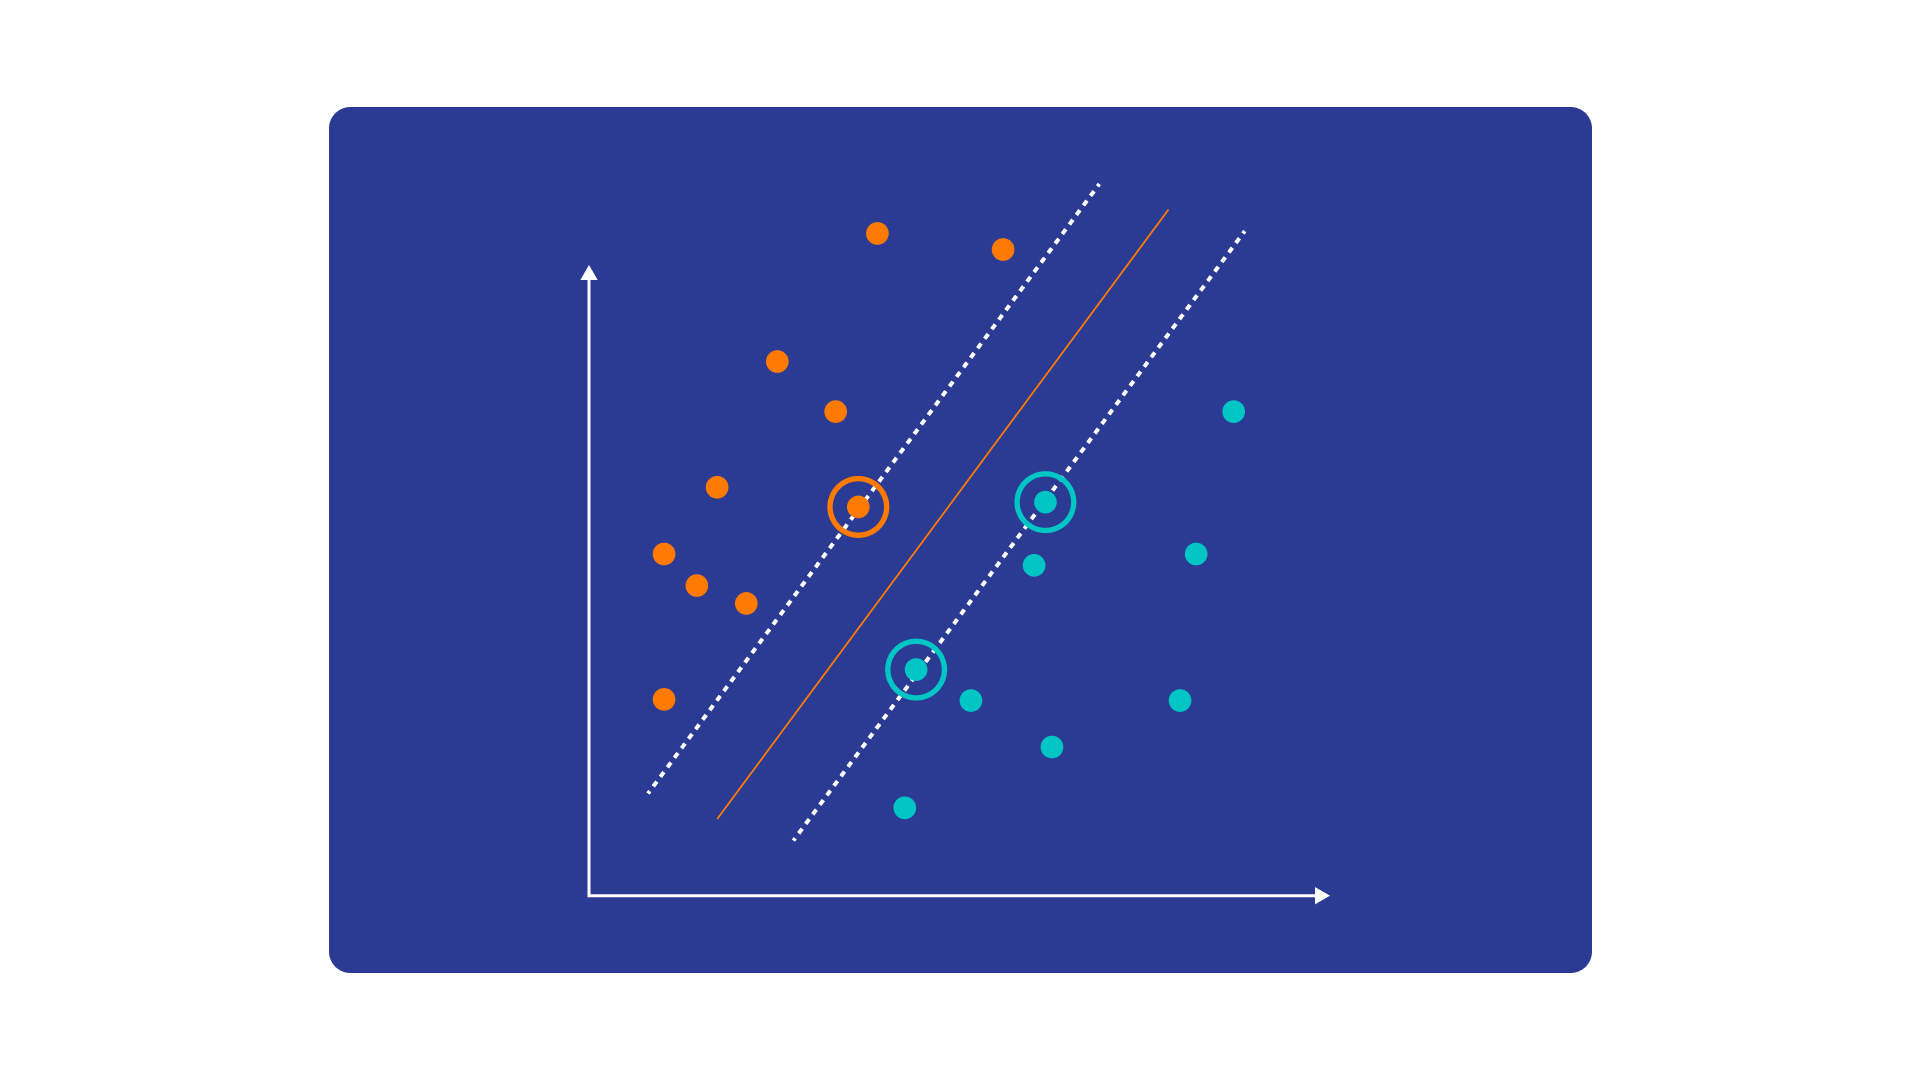

In [ ]:
"""
Рассмотрим датасет, содержащий набор новостных статей из категорий 'атеизм' и 'космос'
"""
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import sklearn
import numpy as np

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [ ]:
print(newsgroups.data[0])

From: 9051467f@levels.unisa.edu.au (The Desert Brat)
Subject: Re: Keith Schneider - Stealth Poster?
Organization: Cured, discharged
Lines: 24

In article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:

> But really, are you threatened by the motto, or by the people that use it?

Every time somone writes something and says it is merely describing the norm,
it is infact re-inforcing that norm upon those programmed not to think for
themselves. The motto is dangerous in itself, it tells the world that every
*true* American is god-fearing, and puts down those who do not fear gods. It
doesn't need anyone to make it dangerous, it does a good job itself by just
existing on your currency.

> keith

The Desert Brat
-- 
John J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________
9051467f@levels.unisa.edu.au      T.S.A.K.C.            \/Darwin o\
For replies, mail to whjjm@wh.whyalla.unisa.edu.au      /\________/
Disclaimer: Unisa hates my opinions.   

Задача состоит в том, чтобы классифицировать статью, отнеся ее к одной из этих категорий. Возникает один вопрос - как нам представить текст в виде вектора? Ведь именно вектор, состоящий из некоторого количества вещественных чисел мы должны передать нашему алгоритму. Рассмотрим один из вариантов векторизации текстов.

# ONE HOT и TF-IDF

TF-IDF - один из известных методов векторизации текстов, основанный на методе векторизации слов (и любых категориальных признаков), называемом one-hot encoding.



Его идея состоит в том, что каждое слово из имеющихся в нашем распоряжении, можно представить в виде вектора вида [0...0 1 0...0], где 1 стоит на единственном месте, отвечающем порядковому номеру этого слова в словаре.

То есть в простейшем случае каждому слову сопоставляется вектор указанного выше вида. Такой подход называется One-Hot-энкодингом.







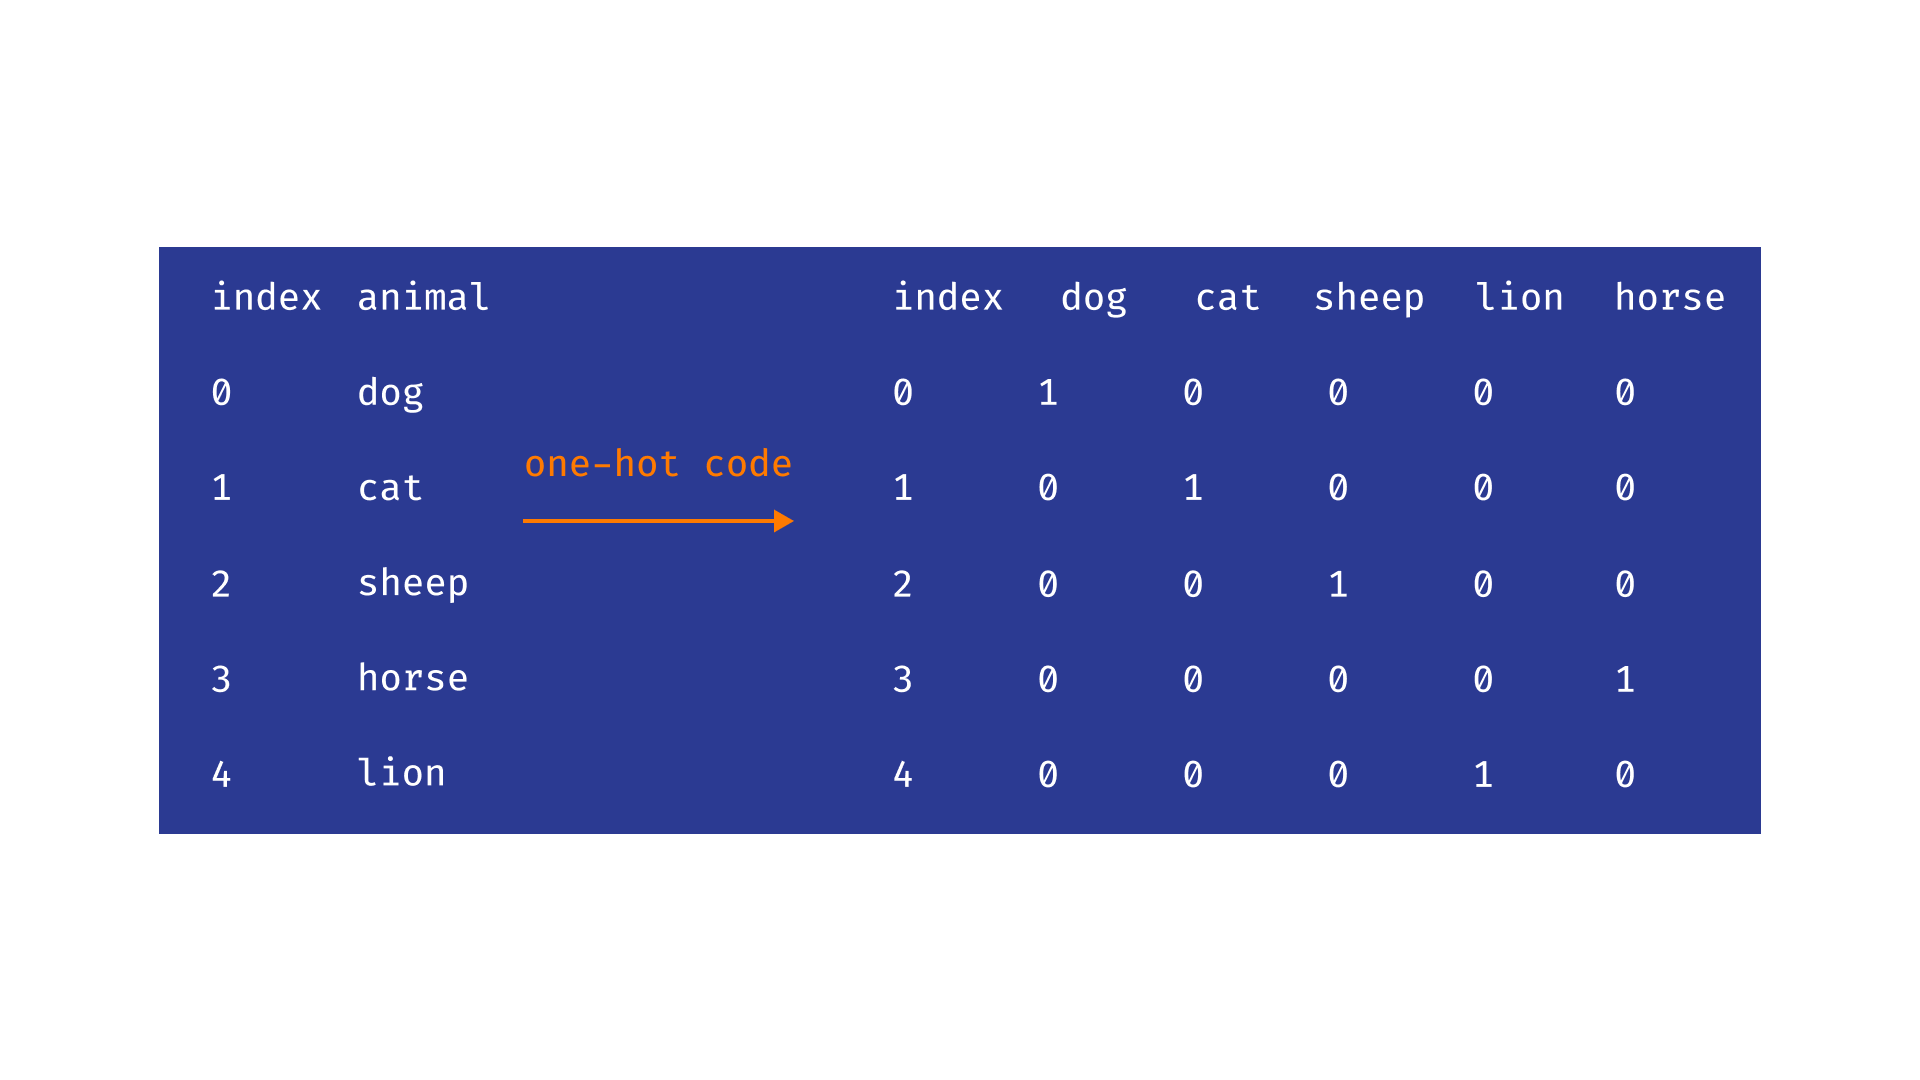

Рассмотрим one-hot encoding на примере реализации sklearn. Этот метод реализован в рамках класса `sklearn.preprocessing.OneHotEncoder`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
vocab = np.array(['I', 'love', 'cats'])

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(vocab.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

Вектор целого текста можно получить из векторов слов, входящих в него, при помощи простого сложения этих векторов. Такой способ векторизации текстов называется мешком слов (Bag Of Words).

TF-IDF - это небольшая модификация идеи Bag Of Words, которая говорит, что векторы слов стоит складывать не просто так, а с некоторым коэффициентом важности. Эта важность слова для характеристики текста определяется исходя из двух соображений:

- Чем чаще слово встречается во всех известных нам текстах, тем менее оно индивидуально и в меньшей степени важно для характеристики именно конкретного нашего текста, и тем меньше должен быть его вес.
- Чем чаще слово встречается именно в нашем тексте, тем сильнее оно характеризует текст, и тем больше должен быть его вес.

На основе этих идей формируется вес каждого слова в тексте, а затем векторы слов складываются именно с этими весами.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [ ]:
classifier = SVC(C = 1.0, random_state=241, kernel='linear')
classifier.fit(X,y)

SVC(kernel='linear', random_state=241)

Обратите внимание: при инициализации Support Vectors Classifier (SVC) в аргумент конструктора мы передаём значение параметра C=1.0

C - это один из важных гиперпараметров SVM, который называется параметром регуляризации. Мы с вами теоретически рассмотрели лишь случай линейно разделимой [выборки](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC), но совсем не все выборки такие. Это не значит, что построить SVM невозможно, просто придется смириться с тем, что некоторое количество ошибок нашим алгоритмом всё же будет допущено. Параметр C в данном случае - это степень "наказания" алгоритма за неизбежно допущенную ошибку.

Слишком большое значение коэффициента C может привести к тому, что алгоритм слишком сильно адаптируется под конкретную выборку, под шумы и выбросы, присутствующие в них, а слишком низкое - к тому, что алгоритм не выучит искомую зависимость в данных.

In [ ]:
feature_mapping = vectorizer.get_feature_names()
#определим наиболее большие по модулю коэффициенты нашего классификатора (топ-10)

#взяли коэффициенты модели, содержащиеся в поле coef_
coef = np.asarray(classifier.coef_.todense()).reshape(-1)
#Взяли модуль
abs_coef = np.abs(coef)
#Выбрали топ-10
sorted_coef = np.argsort(abs_coef)[-10:]

sorted_coef

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([22936, 15606,  5776, 21850, 23673, 17802,  5093,  5088, 12871,
       24019])

In [ ]:
#Нам мало, что говорят индексы элементов. Посмотрим на то, какие слова непосредственно отвечают этим индексам
np.array(feature_mapping)[sorted_coef]

array(['sci', 'keith', 'bible', 'religion', 'sky', 'moon', 'atheists',
       'atheism', 'god', 'space'], dtype='<U80')

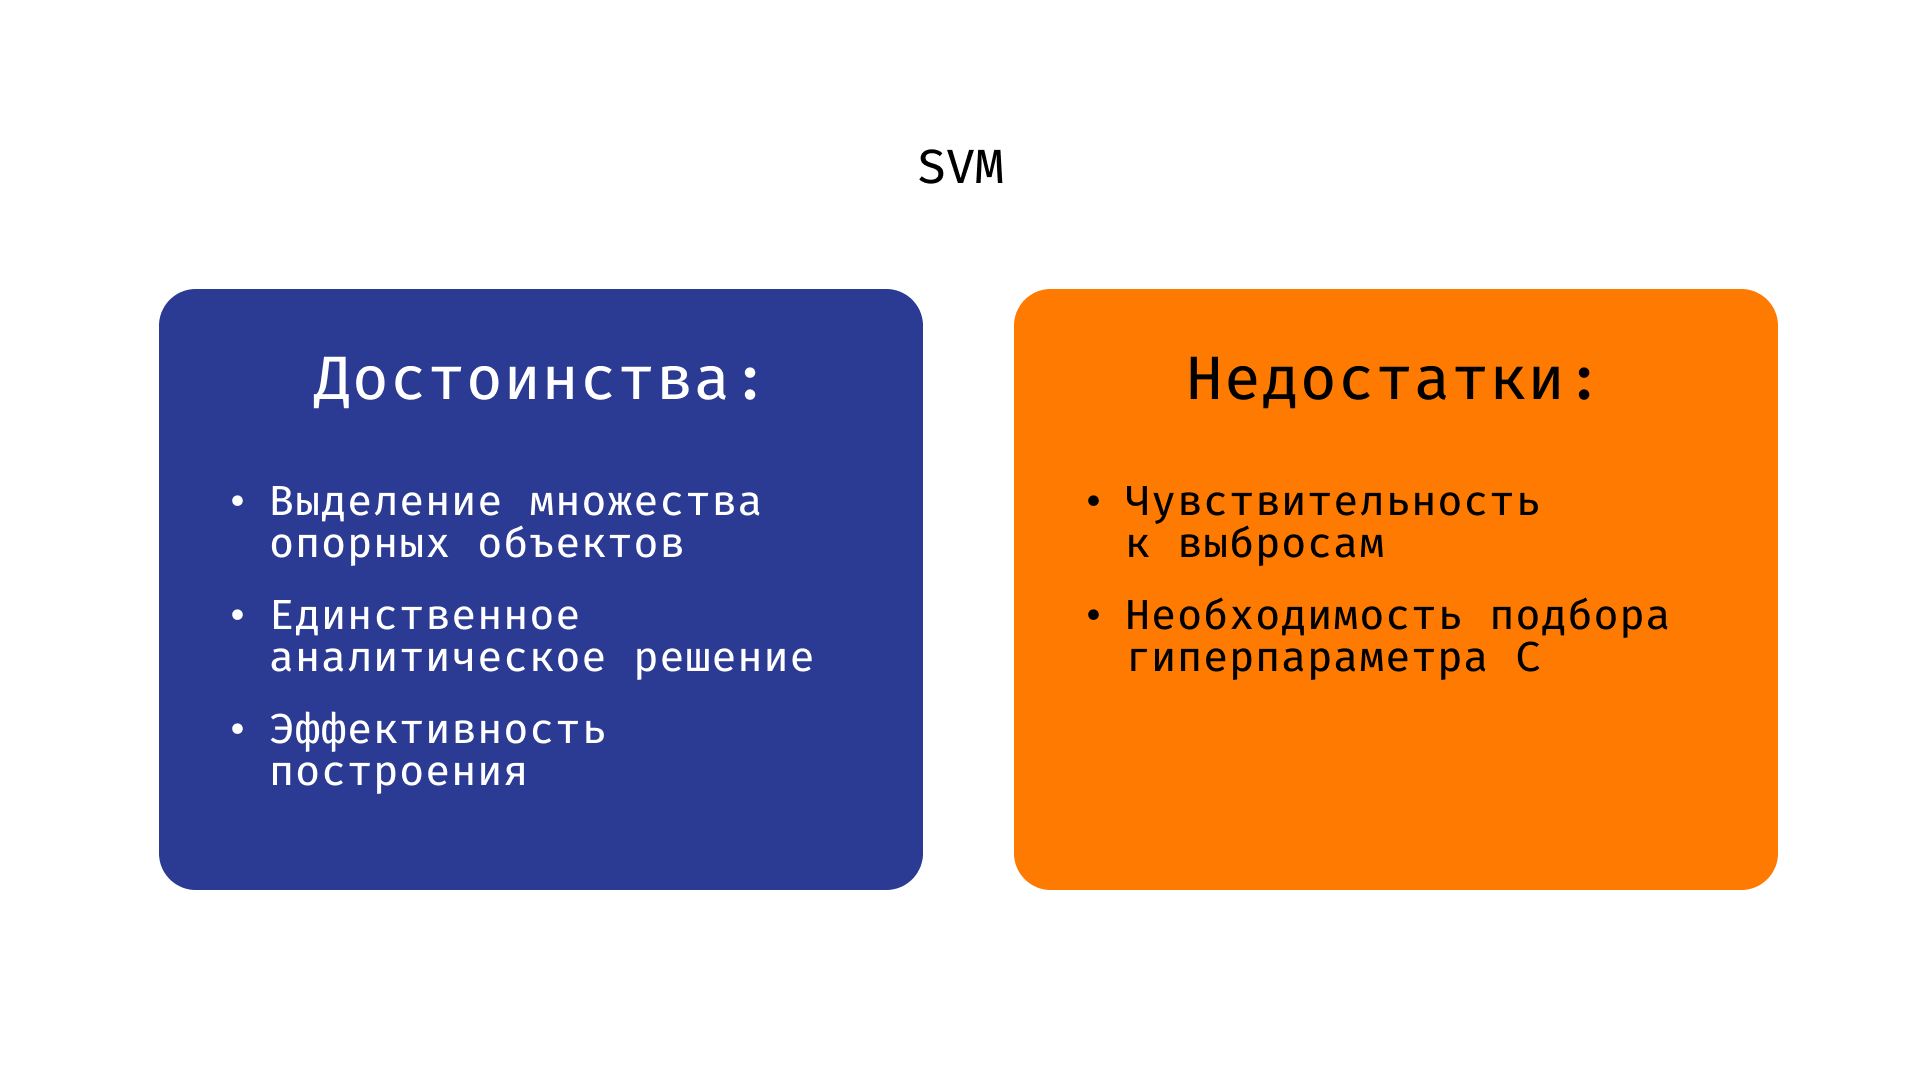

# Логистическая регрессия

Мы можем также потребовать другое интересное свойство: пусть наш алгоритм возвращает не просто номер класса, а **вероятность принадлежности объекта** тому или иному классу. Тогда мы получаем алгоритм, который носит название логистической регрессии.

Идея состоит в том, что наш классификатор должен теперь выдавать не строгие ответы 1/0, а лишь **вероятность** принадлежности объекта классу 1, при этом оставаясь линейным классификатором.

Такой способ классификации называется **мягкой классификацией**, то есть классификацией, при которой алгоритм возвращает степень принадлежности объекта одному из классов. Альтернативный более привычный нам способ классификации - **жёсткая классификация**, при которой алгоритм однозначно возвращает нам один из классов.

Для того чтобы сделать это, мы воспользуемся очень известной функцией, которую обычно называют [сигмоидой](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=v2VSpP-GGtSq):

$$σ(x) = \frac{1}{1 + e^{-x}}$$


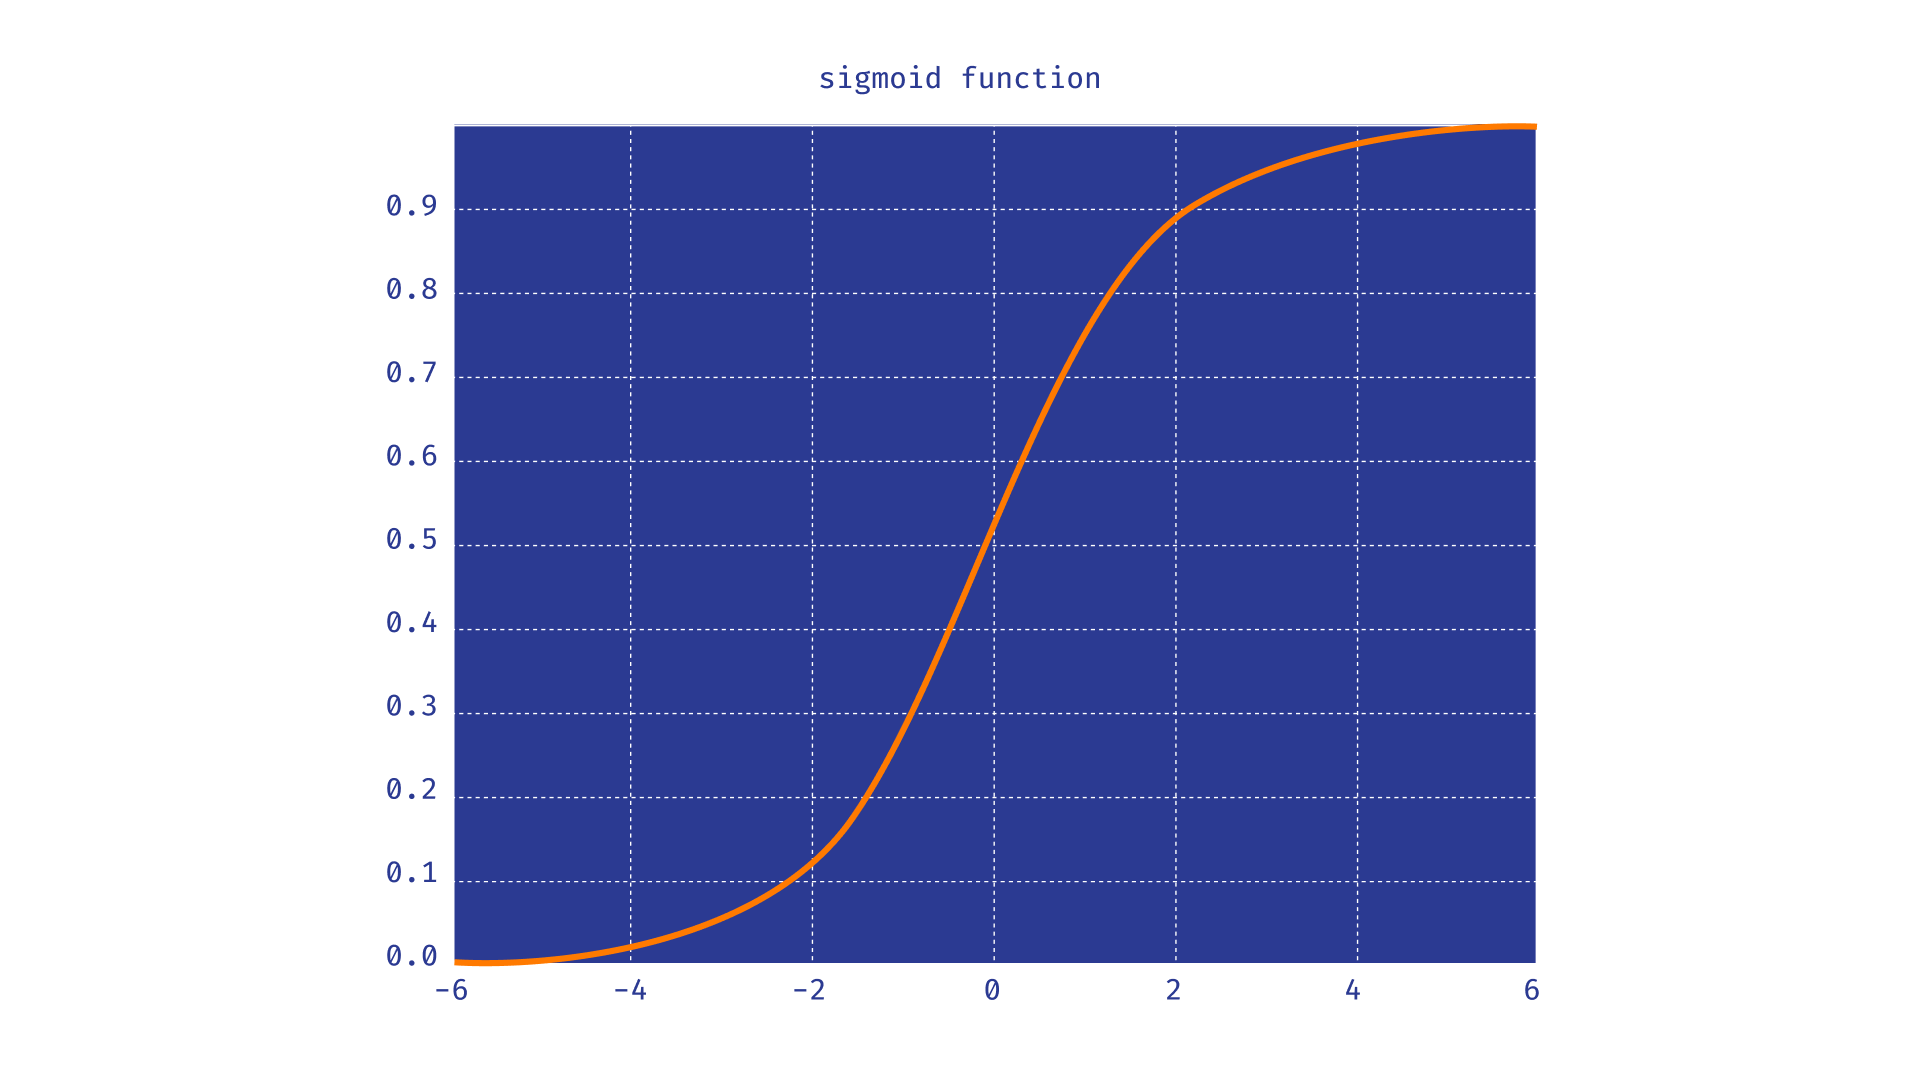



Сигмоида обладает рядом хороших свойств:

1) Значения сигмоиды, как нетрудно убедиться, лежат в диапазоне от 0 до 1

2) Ось Y график сигмоиды пересекает в точке 0.5

3) Функция стремится к 1 на бесконечности и к 0 - на минус бесконечности

Пусть алгоритм будет следующим:

Вместо обычного вычисления функции $(w,x) + w_0$, по знаку которой мы делаем вывод о принадлежности к классу 0 или классу 1, мы применим к полученному значению функцию сигмоиды.

То есть $a(x) = σ((w,x) + w_0)$

Обратим внимание вот на что:

- Когда наш классификатор принял решение отнести объект к классу 1, $(w,x) + w_0 > 0$, то есть $σ((w,x) + w_0) > 0.5$, а когда объект отнесен к классу 0 - $σ((w,x) + w_0) < 0.5$. То есть 0.5 для нас теперь граница принятия решения
- Классификатор теперь выдает нам любое число от 0 до 1
- Чем больше отступ, то есть, чем увереннее модель, тем больше будет значение $a(x)$.

Все это дает нам повод воспринимать выход $a(x)$ именно как вероятность принадлежности объекта классу 1!
Когда эта вероятность больше 0.5 - мы относим объект к классу 1, но эта же ситуация соответствует случаю, когда и модель обычного линейного классификатора, дала нам значение класса 1. Аналогично с 0. При этом выполняются все свойства вероятности.

Простое навешивание сигмоиды помогло превратить нашу модель линейного классификатора в модель, возвращающую вероятности. Такая модель называется **логистической регрессией**



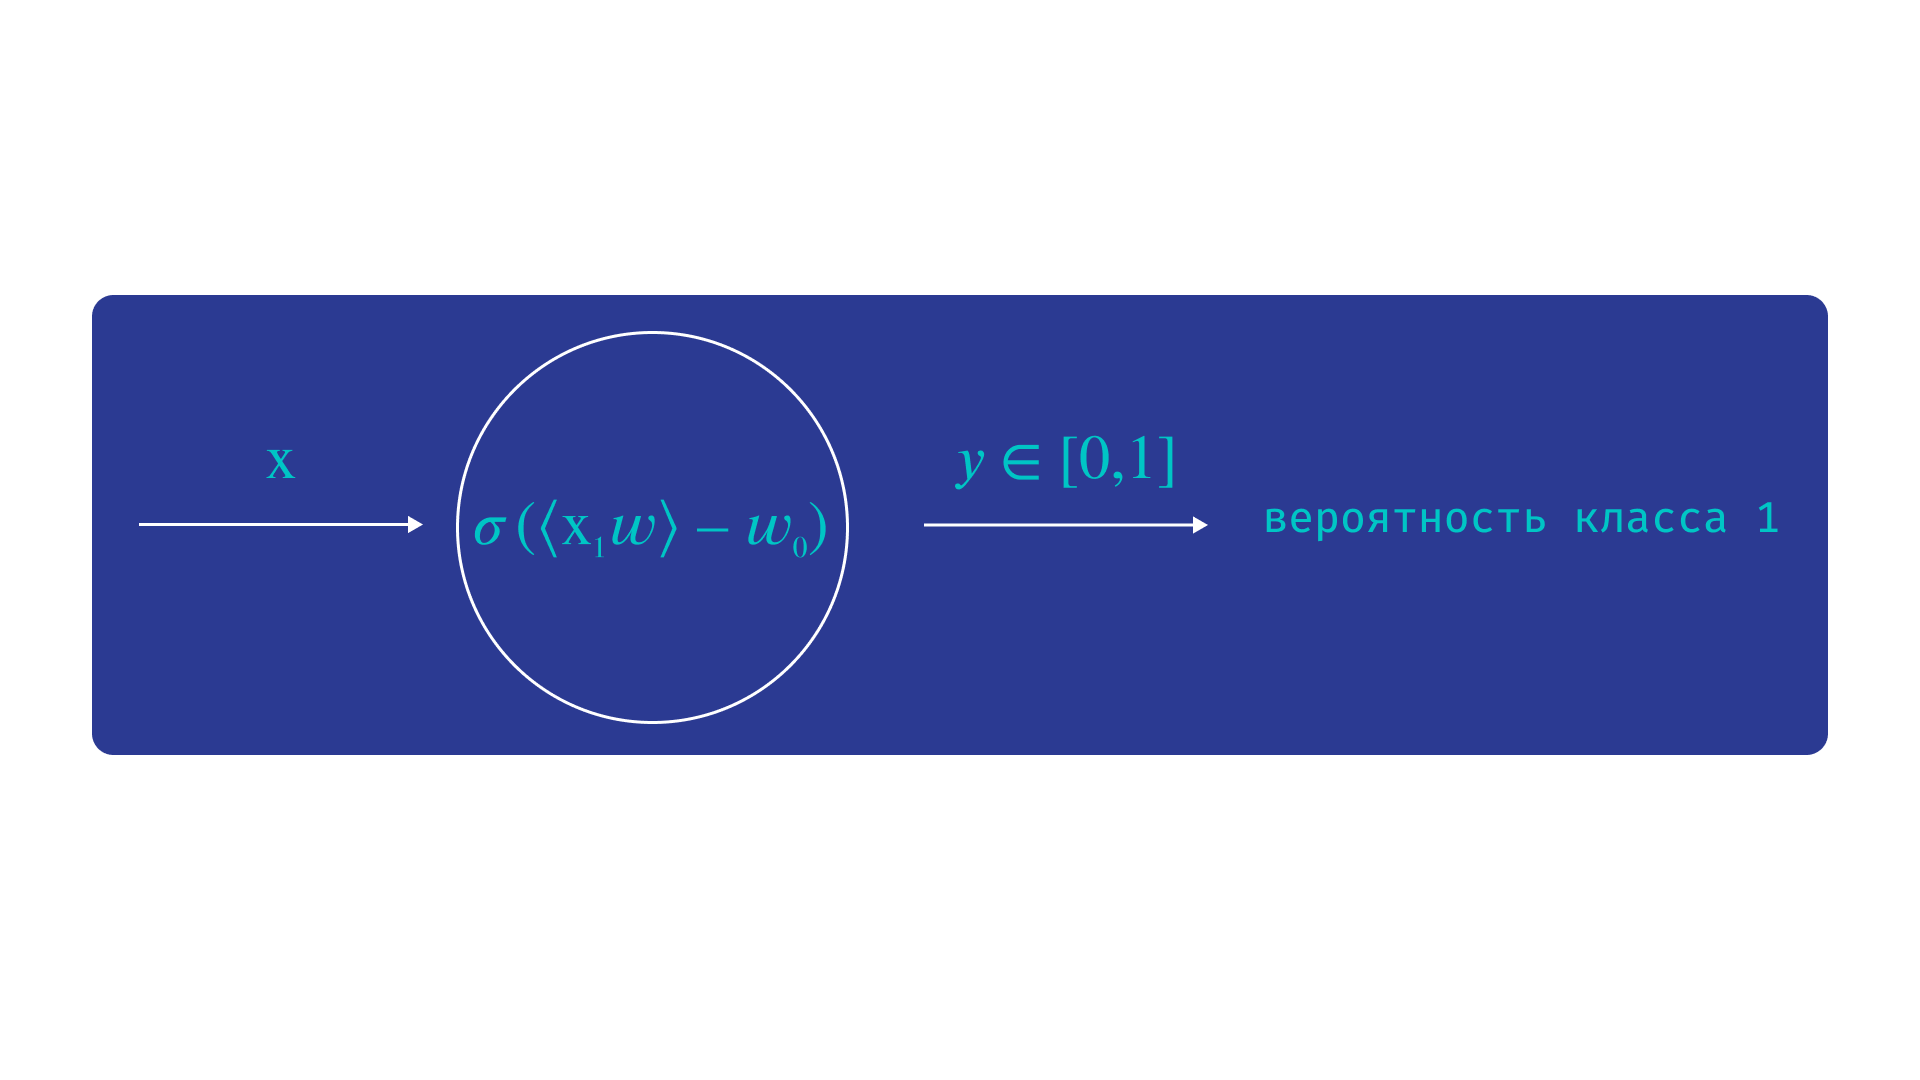

# Обучение модели

Для всех этих моделей нам необходимо подобрать оптимальный вектор параметров $\vec{w}$ (и ${w_0}$). В случае SVM мы упомянули, что этот вектор можно найти при помощи некоторой аналитической процедуры, в подробности которой мы вникать не стали. В случае логистической регрессии процедуры, позволяющей определить точный минимум функции ошибки, просто не существует.

________________________
**Напоминание.**
Функция ошибки (Loss-функция, функция потерь) - это функция, зависящая от параметров модели, показывающая насколько сильно эта модель ошибается.

Loss-функция зависит не столько от самой модели, сколько от задачи, которую мы решаем.

На прошлой лекции мы рассматривали задачу регрессии в контексте метрических методов и обсуждали, что эту задачу можно решать исходя из условия минимизации среднего квадрата ошибки предсказания модели. Это классический пример loss-функции.

В задаче бинарной классификации в качестве loss-функции обычно используется бинарная кросс-энтропия (Binary Cross-Entropy, BCE). Эта функция зависит от настоящих меток $y$ и предсказаний алгоритма $a(x) = p$, и выглядит следующим образом:

$$H(p, y) = - (y \cdot ln(p) +(1 - y) \cdot ln(1-p))$$

Эту функцию выбирают исходя из теоретико-информационных соображений.
________________________

Ясно, что задача обучения модели сводится к подбору таких параметров $\vec{w}$, которые доставляют минимум ожидаемой функции потерь, в математической записи $\vec{w} = argmin(Loss_{expected}(\vec{x}, \vec{w}))$. Значит, нам нужна какая-то процедура, позволяющая этот минимум найти даже тогда, когда не существует аналитических путей поиска этого минимума. Один из самых популярных алгоритмов такого рода - градиентный спуск.

# Градиентный спуск


Поиск минимума функции можно сравнить с хождением по горам.

Представьте себе, что вы - путешественник, идущий по горе и стремящийся спуститься вниз. В реальности вы будете выбирать свой путь исходя из обзора окружающей местности. Но в случае поиска минимума функции мы можем посчитать только характеристики функции в конкретной точке, поэтому правильной ассоциацией будет случай, когда прежде чем подняться на гору, вы завязали себе глаза. Вы знаете высоту, на которой находитесь, и чувствуете, какой наклон поверхности горы там, где вы находитесь. 

Что вы будете делать в этом случае? С каждым шагом вы будете идти в ту сторону, куда наклон поверхности наиболее крутой.

Эту идею можно распространить на математическую модель поиска минимума. Из математического анализа известно, что если мы имеем функцию $F = F(x_1 ... x_n)$, то вектор [частных производных](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=aGVowH1ufYP_) этой функции (называемый градиентом), $$\vec{grad(F)} = \vec{∇F} = (\frac{\partial F(x_1)}{\partial x_1} ... \frac{\partial F(x_n)}{\partial x_n})$$

направлен в сторону **наискорейшего роста функции**. Вектор же **антиградиента**, соответственно, направлен в направлении наискорейшего убывания функции. Если мы хотим *шаг за шагом* приближаться к минимуму функции, мы должны каждый раз делать небольшой шажок в направлении антиградиента. Математически эту идею можно записать в виде следующей формулы: $$\vec{x_{n+1}} = \vec{x_n} - λ\vec{∇F(x)}$$ Где $λ$ характеризует размер нашего шага.

Применив эту идею для поиска минимума Loss-функции по параметрам нашей модели $\vec{w}$, мы найдем оптимальный (или почти оптимальный) вектор параметров модели, который и будем использовать при классификации. Запомним эту идею! 


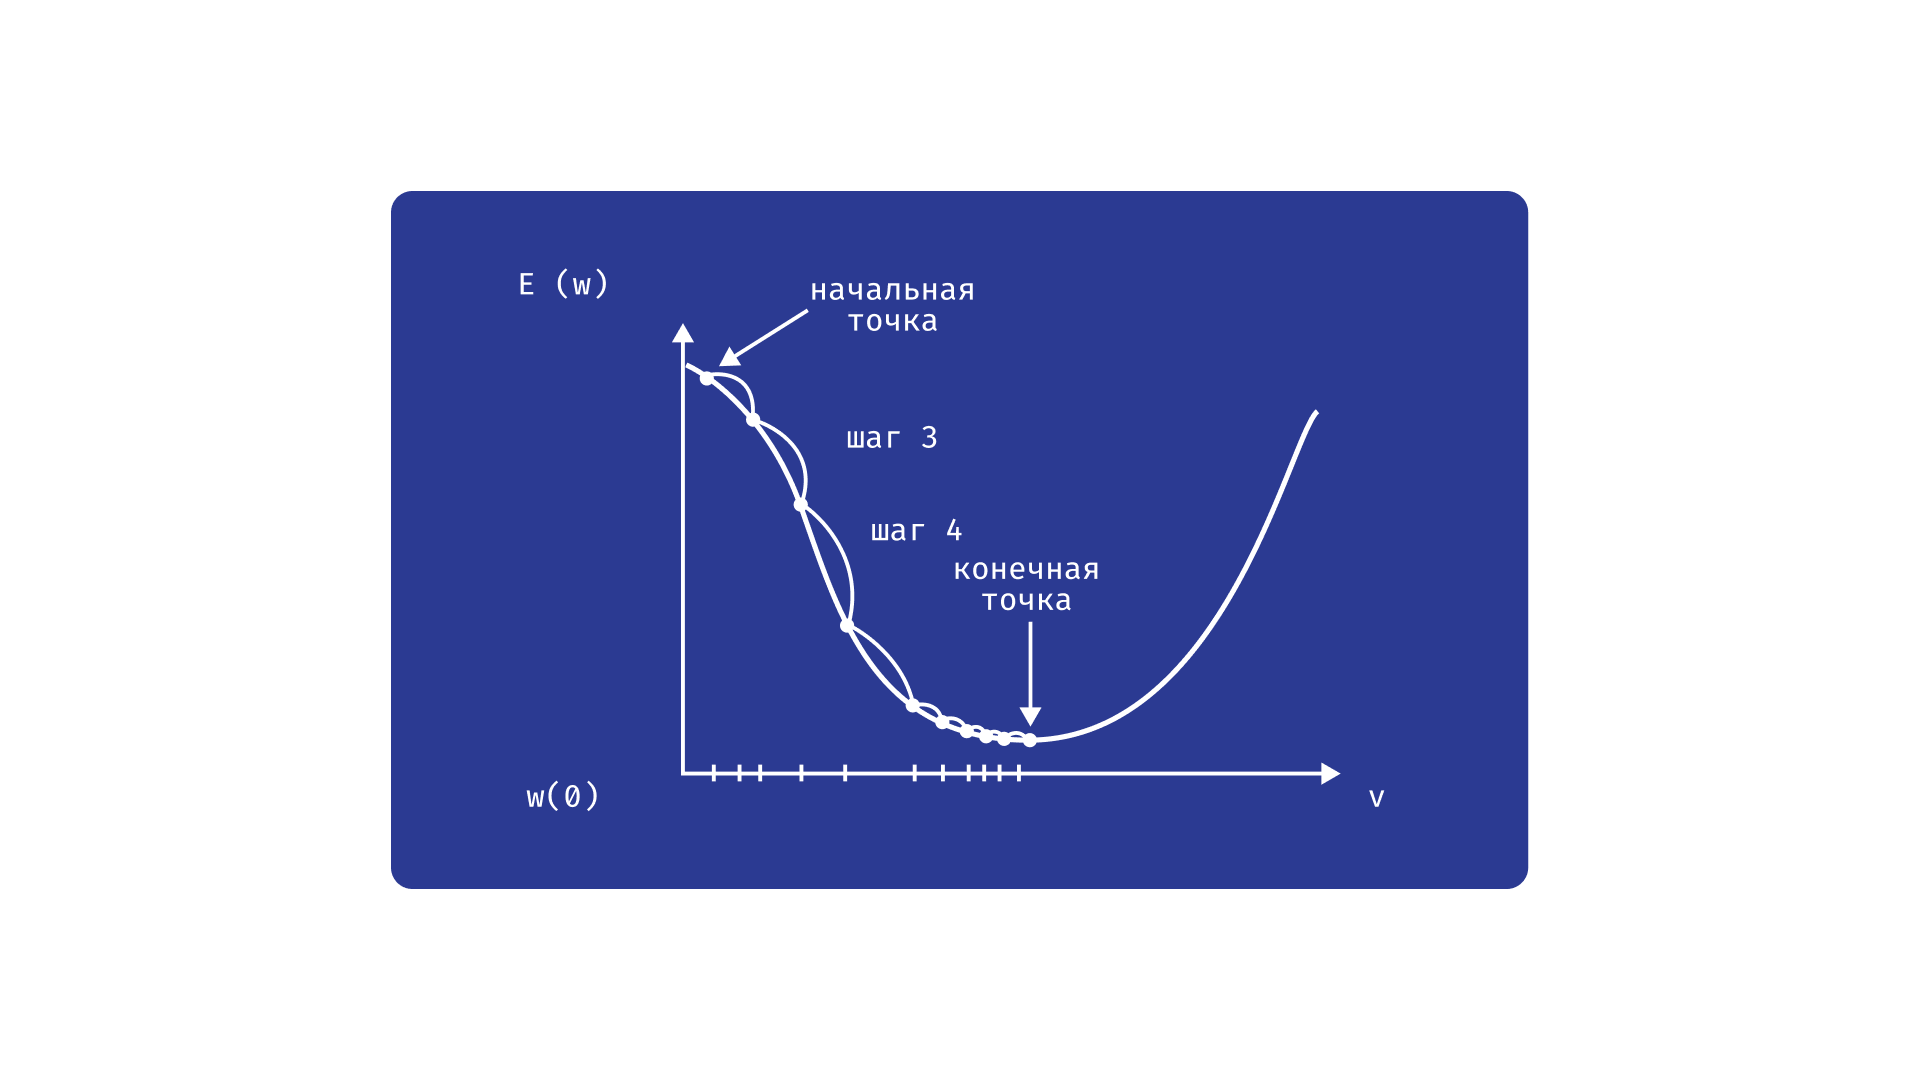

# Производные $\frac{\partial H}{\partial \omega_i}$

В рамках алгоритма градиентного спуска нам необходимо посчитать [производные](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1m66zhVnUv9w) функции бинарной кросс-энтропии по параметрам модели, чтобы делать шаги градиентного спуска.

Покажем, как можно посчитать эту производную.

Рассмотрим случай, когда нам необходимо посчитать производные всего для одного примера. То есть мы имеем единственный объект $x$ с истинной меткой $y$ и гипотезой нашего алгоритма $p$. Тогда $$H(p, y) = - (y \cdot ln(p) +(1 - y) \cdot ln(1-p))$$

Причем $p = σ(ω_1 \cdot x_1 + ... + ω_{n} \cdot x_n + ω_0 ⋅ 1)$

Вспомним простое правило из математического анализа о вычисленнии [производной сложной функции](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=qny-9SFZUibG):

$$\frac{∂ H}{∂ ω_i} = \frac{∂ H}{∂ p} \cdot \frac{∂ p}{∂ ω_i}$$
Посчитаем первое и второе слагаемое по отдельности.
- $\frac{∂ H}{∂ p} = -y ⋅ \frac{1}{p} + (1-y) \cdot \frac{1}{1 - p}$

Вспомним одно из основных свойств сигмоидальной функции (его доказательство - полезное упражнение, рекомендуется выполнить его самостоятельно):
$σ' = σ \cdot (1 - σ)$
- $\frac{∂ p}{∂ ω_i} = p⋅(1 - p)⋅x_i$, если $i \neq 0$
- $\frac{∂ p}{∂ ω_0} = p⋅(1 - p)$

Введём обозначение $x_0 ≡ 1$

Тогда оба равенства можно записать $\frac{∂ p}{∂ ω_i} = p⋅(1 - p)⋅x_i$

Перемножим полученные результаты:

$$\frac{∂ H}{∂ ω_i} = p⋅(1 - p)⋅x_i ⋅ (-y ⋅ \frac{1}{p} + (1-y) \cdot \frac{1}{1 - p}) = x_i((1 - y)⋅p - y⋅(1-p))$$

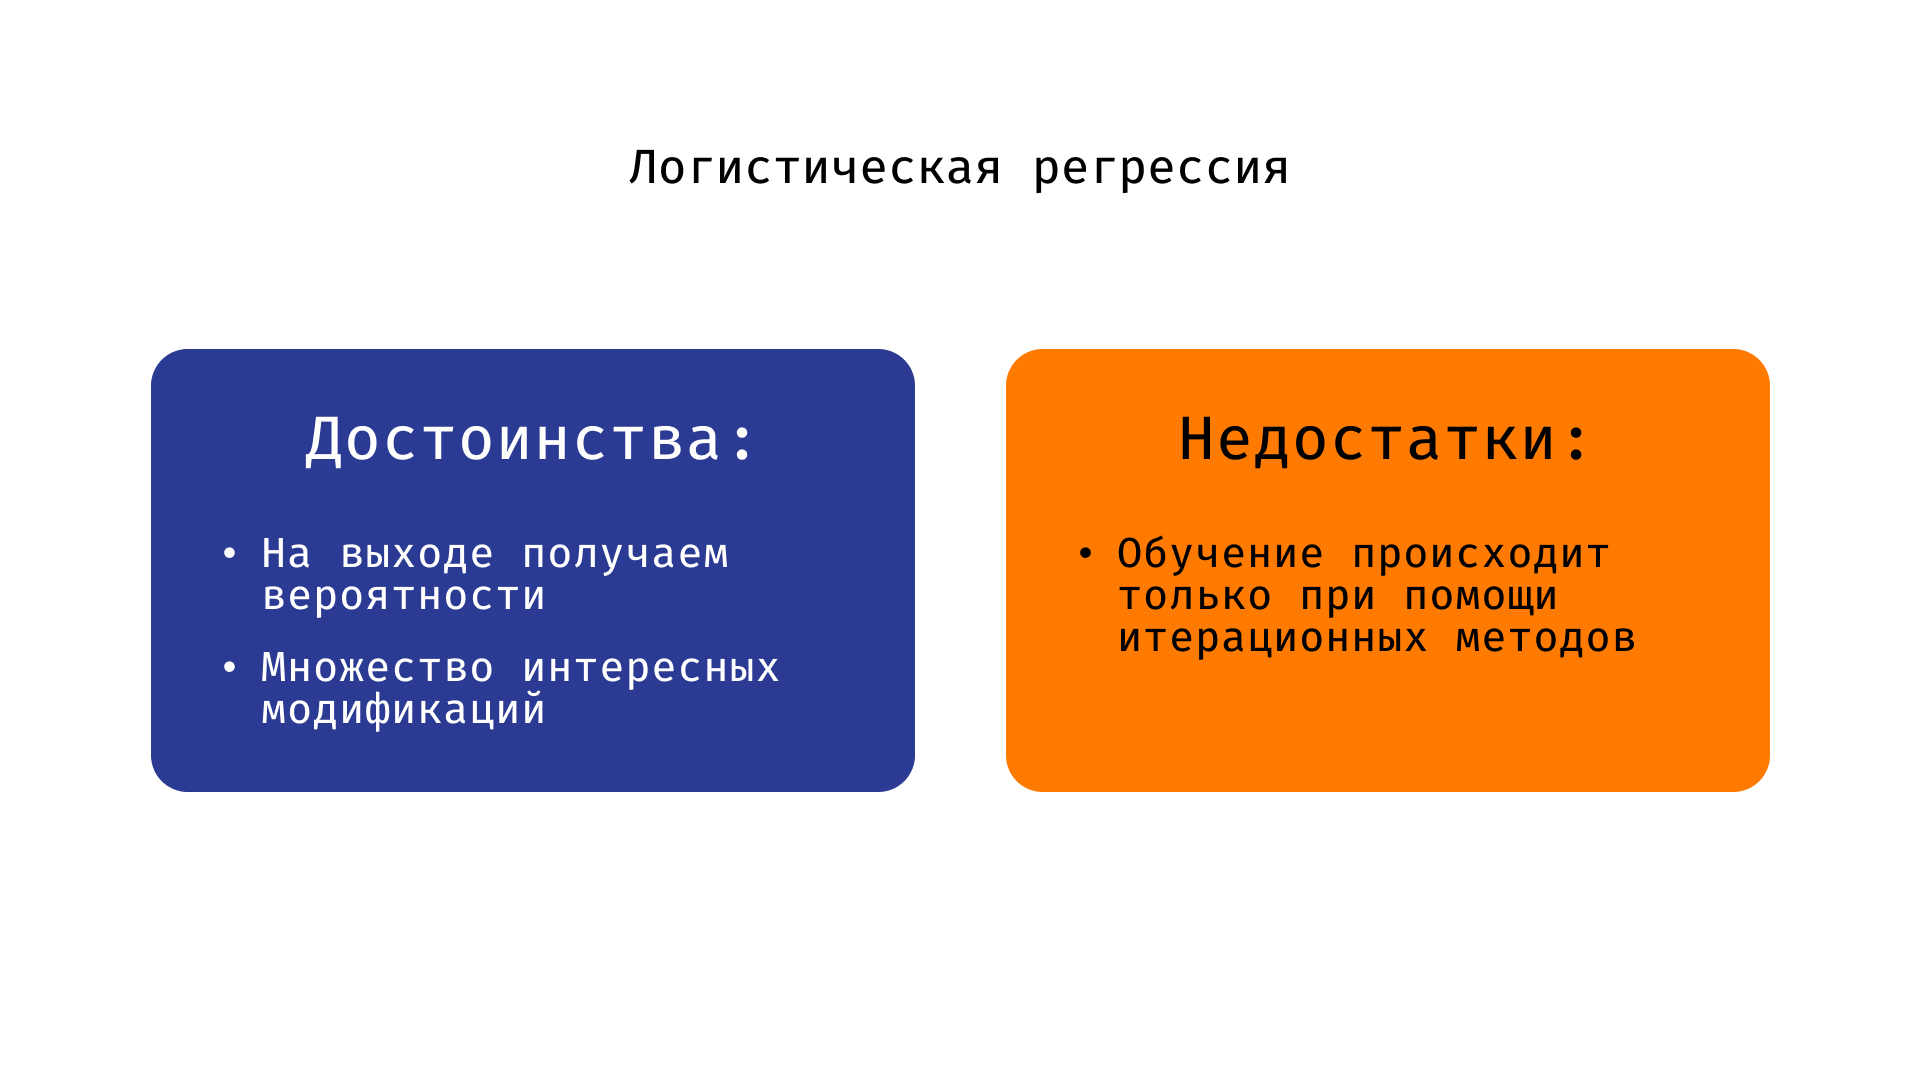

# Scaling

Необходимость шкалирования (приведения признаков к единой шкале) в рамках предобработки данных - известная особенность линейных (да и многих других) моделей машинного обучения.

Вспомним, что любая линейная модель представляет из себя в общем случае [функцию](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=dbrEUiDnQeXA) вида:

$$f(x_1ω_1 + ... + x_nω_n + ω_0)$$

В этом случае крайне важно следующее соображение: 

Если признаки $x_1 ... x_n$ представляют из себя переменные разного масштаба (например, характерное значение $x_1$ ~ $1$, в то время как $x_2$ ~ $1000$), то малые изменения признаков с большим масштабам приведут к ощутимым изменениям результата, в то время как даже довольно существенные изменения признаков маленького масштаба к таким изменениям почти не приведут.

Вы, конечно, можете сказать, что в теории добиться баланса можно как раз за счёт аккуратного выбора коэффициентов $\omega_1 ... ω_n$, которые могут уравновесить этот дисбаланс. Да, в теории могут, но на практике эта ситуация практически недостижима. И чем меньше размер нашей выборки, тем менее вероятна эта ситуация. Алгоритму требуется наша помощь для решения указанной проблемы.

Ещё более явно эта проблема встает перед нами, когда мы говорим о метрических методах. Представим, что мы работаем с двумерным пространством, то есть с объектами, [векторное](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) описание которых имеет вид $\vec{x} = (x_1, x_2)$. Пусть $x_1$ ~ $1$, а $x_2$ ~ $1000$. Рассмотрим 3 объекта:

$$\vec{x_1} =(1, 1000)$$
$$\vec{x_2} = (0.01, 1000)$$
$$\vec{x_3} = (1, 1010)$$

В данном случае с точки зрения большинства рассмотренных нами метрик [расстояние](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BQYo5PC3B_jZ) между $\vec{x_1}$ и $\vec{x_2}$ будет меньше, чем между $\vec{x_1}$ и $\vec{x_3}$, ведь основной вклад в расстояние вносит именно вторая координата. Но мы видим, что относительное изменение первой координаты при переходе от $\vec{x_1}$ к $\vec{x_2}$ намного больше, чем относительное изменение второй координаты при переходе от $\vec{x_1}$ к $\vec{x_3}$. Этот факт может свидетельствовать о том, что отличия между первым и вторым объектом в реальности намного больше, чем между первым и третьим, то есть алгоритм вводит нас в заблуждение.

Например, если первая координата описывает вероятность крушения самолёта в случае удара в него молнии, а вторая - максимальную дальность полёта, очевидно, что настолько существенные отличия в первой координате будут значить для нас намного больше, чем столь несущественные отличия во второй. Любой метрический алгоритм не сможет этого учесть.

Итак, мы пришли к выводу о необходимости приведения всех признаков к единой шкале. Существует довольно много способов сделать это. Мы рассмотрим наиболее распространенный метод.

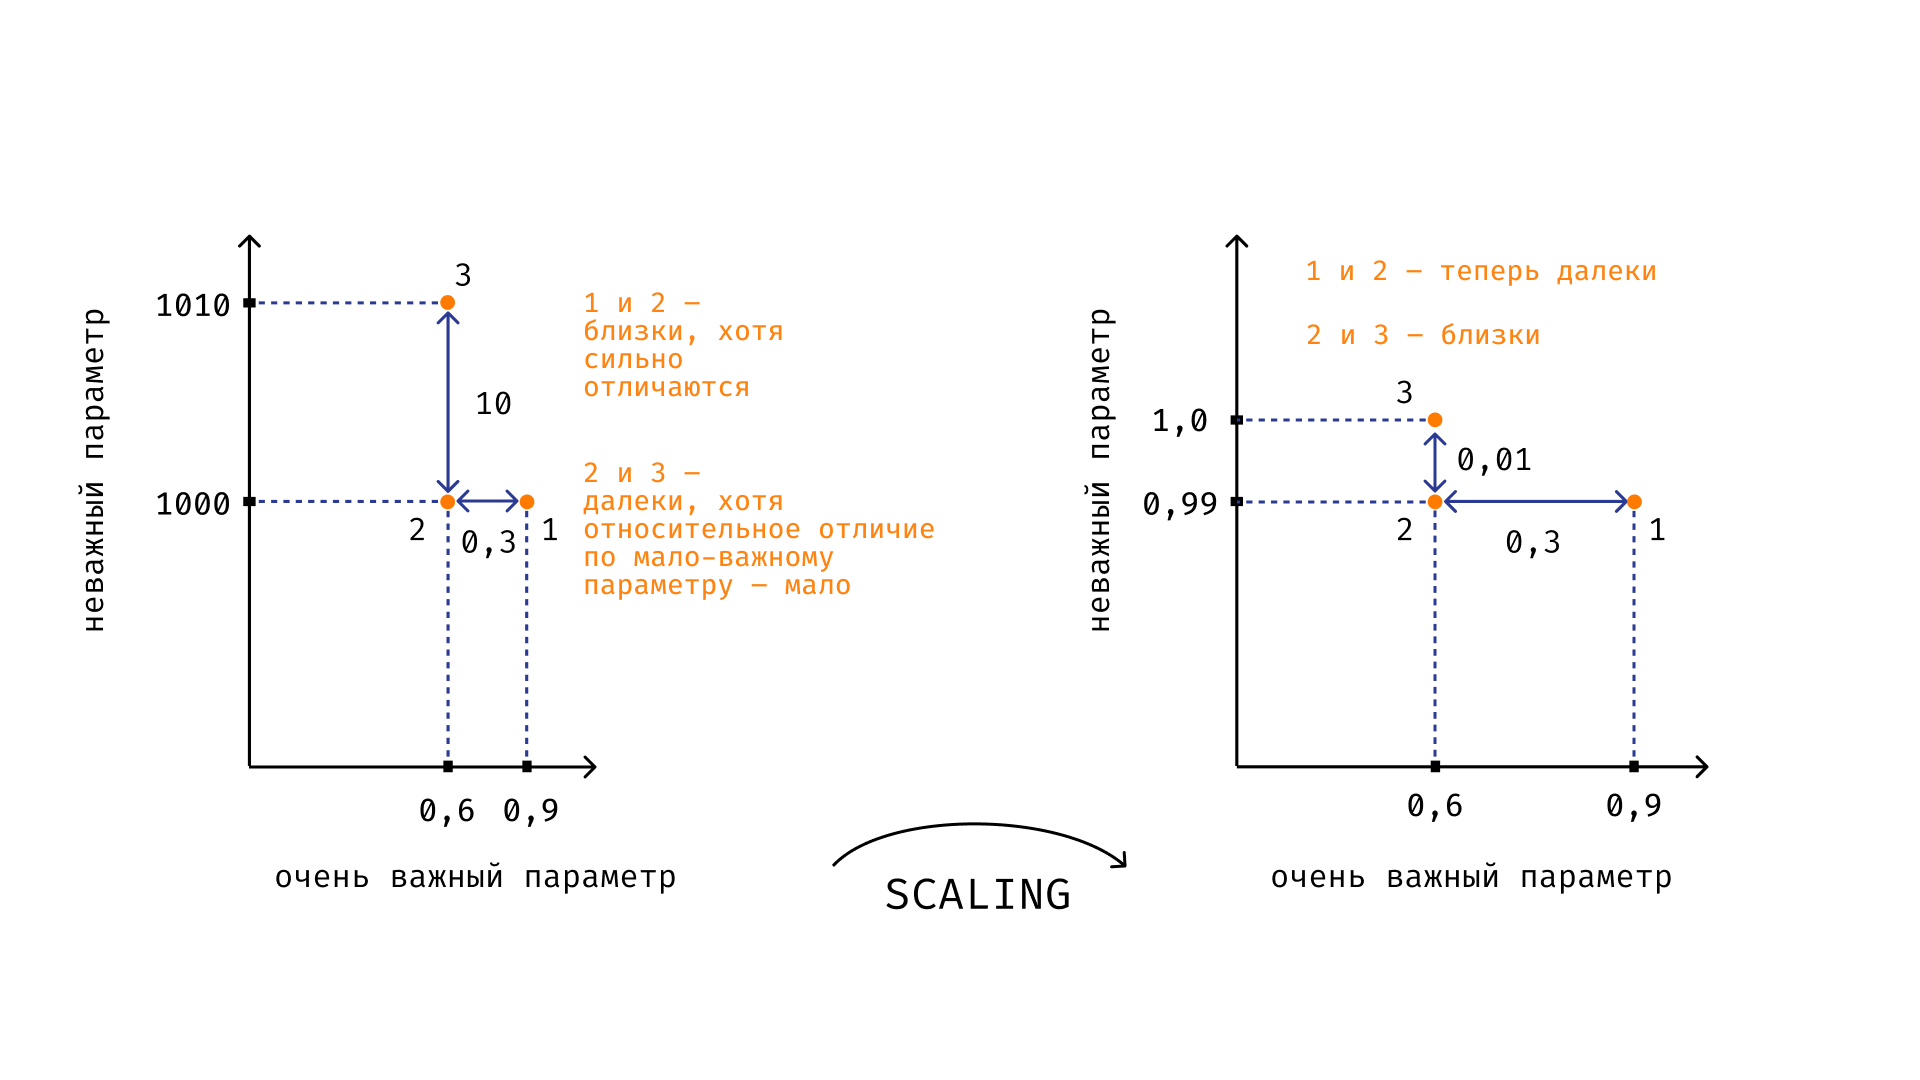

## Standard Scaling

Standard Scaling - это общепринятая в статистике процедура нормализации [выборки](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC):

$$\hat{x} = \frac{x - μ}{σ}$$

Где $μ = E[x]$ - [математическое ожидание](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=WFWnaX2VjmSc), которое обычно заменяется просто выборочной оценкой (среднему значению $x$ по датасету), а $σ$ соответственно - [стандартное отклонение](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=iIg2ARx8qfdJ), которое также обычно вычисляется по датасету.

Сделать это можно при помощи соответственно `np.mean()` и `np.std()`.

Теперь мы довольно просто можем написать функцию `scale`:

In [ ]:
def scale(X):
  x_mean = X.mean(axis=0)
  x_std  = X.std(axis=0)
  X_scaled = (X - x_mean)/x_std
  return X_scaled

Сгенерируем искусственную выборку и проверим, что все координаты действительно будут отмасштабированы.

In [ ]:
scales = np.array([1, 0.1, 10])
x = np.random.randn(1000, 3)* scales.reshape(1,-1)
x

array([[-5.29348997e-01,  9.75286946e-03, -6.39207670e+00],
       [-2.20355870e-01,  5.89369647e-02,  8.34311237e+00],
       [-5.32168991e-01, -2.11029221e-01,  7.05203916e+00],
       ...,
       [ 3.21329129e-01, -1.88590943e-01,  2.70828570e+00],
       [-1.27244596e+00,  4.44927722e-02, -1.34077113e+01],
       [ 5.28880937e-01,  1.66323233e-02,  9.93776827e-01]])

### Violinplot
_________________________________________________________________

Воспользуемся методом визуализации при помощи `violinplot`. 
`Violinplot` - это способ визуализации распределения, когда оценка плотности распределения строится вдоль горизонтальной оси, в то время как вертикальная ось служит для отметки значений, на которых это распределение построено.

Проще говоря, мы берём самый обычный график плотности распределения случайной величины, делаем его симетричным (для красоты) и "поворачиваем" его набок (для еще большей красоты и возможности сравнить с другими распределениями).

Например, посмотрим на то, как выглядит самый обычный график нормального распределения

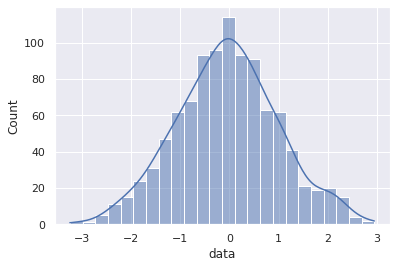

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme()
data = np.random.randn(1000)
df = pd.DataFrame({'data': data})
sns.histplot(data=df,x = 'data', kde=True)

`Violinplot` в этом случае получится немного другим

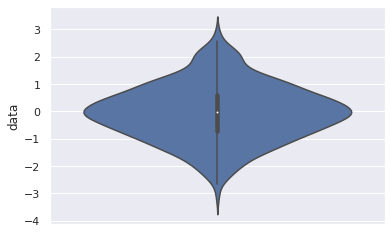

In [ ]:
sns.violinplot(data=df, y='data')

А равномерное распределение, к примеру, будет выглядеть так

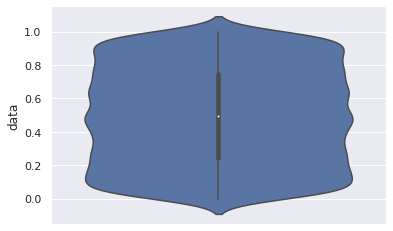

In [ ]:
data = np.random.uniform(size=10000)
df = pd.DataFrame({'data': data})
sns.violinplot(data=df, y='data')

_________________________________________

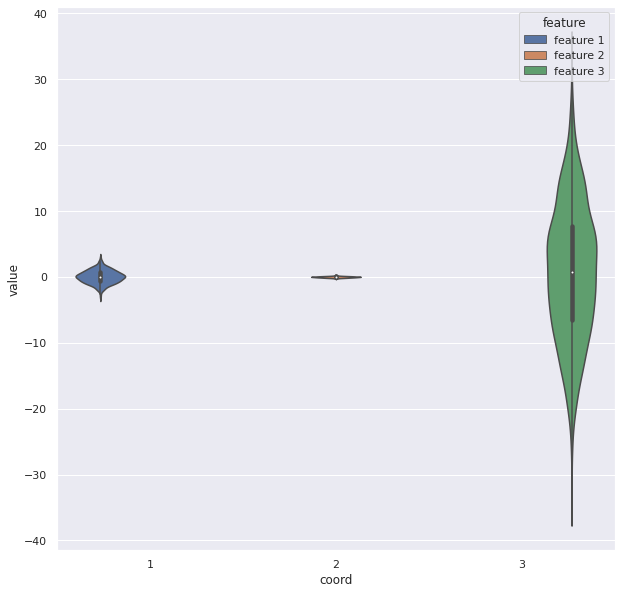

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

def draw_violin(x):
  df = pd.DataFrame({'value': list(x[:,0]) + list(x[:,1]) + list(x[:,2]), 
                    'feature': ['feature 1']*1000 + ['feature 2']*1000 + ['feature 3']*1000, 
                    'coord': [1]*1000 + [2]*1000 + [3]*1000})
  plt.figure(figsize=(10,10))
  sns.violinplot(data=df, x='coord', y='value', hue='feature')
draw_violin(x)

Сейчас, как мы видим, все признаки серьёзно отличаются по масштабу. Применим функцию `scale`

In [ ]:
x_ = scale(x)
x_

array([[-0.58023054,  0.10145748, -0.69869926],
       [-0.26689973,  0.58992323,  0.74767165],
       [-0.58309012, -2.09121252,  0.62094299],
       ...,
       [ 0.2823895 , -1.86836954,  0.19457054],
       [-1.33375918,  0.44647252, -1.38733716],
       [ 0.49285495,  0.16977992,  0.02627845]])

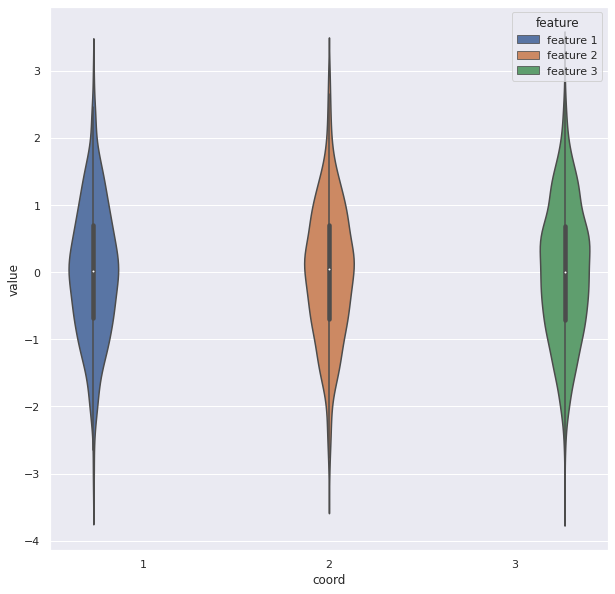

In [ ]:
draw_violin(x_)

Как мы видим, все признаки теперь приведены к единой шкале и имеют один и тот же масштаб. Заметьте: средние значения никак не изменились.

Конечно, такая функция есть и в библиотеке `sklearn`.

Рекомендуемая реализация содержится в классе `sklearn.preprocessing.StandardScaler`

Объекты класса `StandardScaler` относятся к т.н. трансформерам данных, то есть преобразуют их. В этой связи, они поддерживают функции `.fit()`, `.transform()` и `.fit_transform()`

`.transform` и `.fit_transform` - это полные аналоги `.predict` и `.fit_predict`, используемые в случаях, когда мы вместо решения задачи прогнозирования просто преобразуем каким-либо способом данные. У всех "преобразователей" данных в `sklearn` эти функции реализованы.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_sk = sc.fit_transform(x)

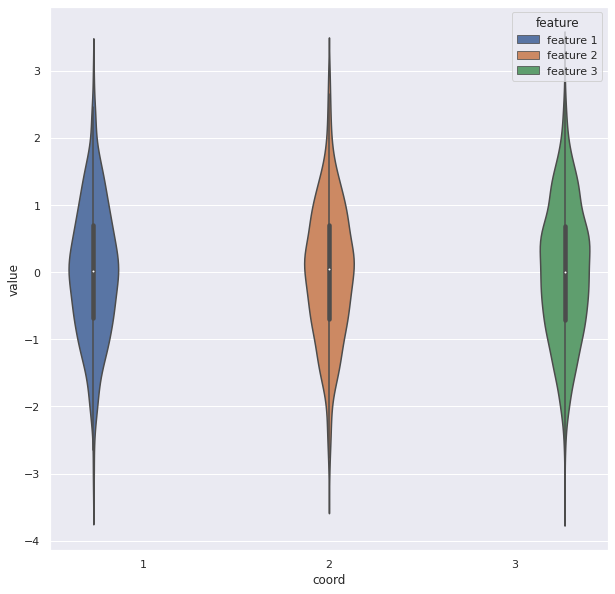

In [ ]:
draw_violin(x_sk)

# Примеры


## Классификация рукописных цифр

Одна из самых старых и проработанных задач машинного обучения - это задача распознавания рукописных цифр. Эта задача относится к задачам многоклассовой классификации. Входные данные представляют из себя изображения рукописных цифр, представленных в виде двумерного массива, содержащего в себе интенсивности каждого из пикселей. В классическом датасете MNIST эти изображения имеют размер $8 × 8$. 

Мы можем загрузить MNIST, воспользовавшись функцией `load_digits` из `sklearn`.

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()

Подгруженная структура имеет тип данных - словарь. Этот словарь содержит множество полей, в которых можно найти описание содержащихся в нём данных

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Как мы видим, картинки представленны именно в виде массива. Мы можем воспользоваться библиотекой `matplotlib` чтобы получить изображения по заданному массиву интенсивностей

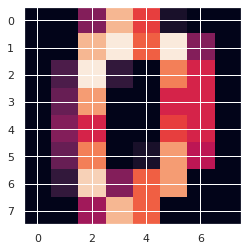

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mnist.images[0])

Намного проще работать с данными в привычном представлении, поэтому получим их при помощи аргумента `return_X_y`. В позиции `True` он инициирует получение данных в стандартизированном виде.

In [ ]:
X, y = load_digits(return_X_y=True)
y[0]

0

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

Воспользуемся логистической регрессией, реализованной в модуле `sklearn.linear_model` при помощи класса `LogisticRegression`

Выполним следующие преобразованиями с данными:

* Разделим выборку на `train` и `test`
* Преобразуем `train` и `test` при помощи `StandardScaler`
* Обучим логистическую регрессию

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Разбиение на train и test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, shuffle=True )

# Предобработка
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# обучение модели
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Теперь оценим качество классификации. Все классификаторы в `sklearn` имеют специальную функцию для оценки качества `.score(x_test, y_test)`. В базовом случае качество оценивается при помощи `accuracy_score`

In [ ]:
score = clf.score(X_test, y_test)
score

0.95

 Довольно хорошее качество. Посмотрим на конкретный пример

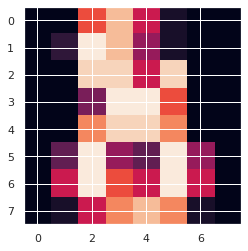

In [ ]:
plt.imshow(mnist.images[-1])

Зрительно кажется, что представленная на изображении цифра - восьмёрка. Убедимся, что это именно она, подсмотрев в ответы.

In [ ]:
y[-1]

8

Это действительно восьмёрка. Узнаем, что думает наша модель

In [ ]:
print('Prediction of model is: ',clf.predict([X_test[-1]])[0])

Prediction of model is:  8


## Разделяющая гиперплоскость
### Сгенерируем синтетический датасет и посмотрим на разделяющую гиперплоскость

Увидим своими глазами, как выглядит разделяющая гиперплоскость в двумерном случае

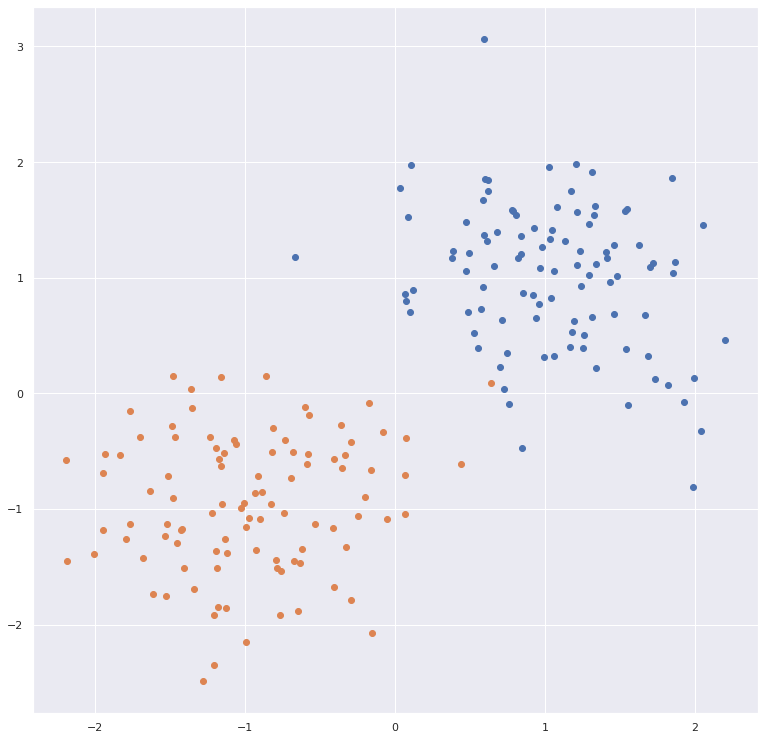

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем параметры визуализации
sns.set_theme()
# Генерируем выборки
class_1 = np.random.randn(100,2)*0.6 + np.array([1.,1.])
class_2 = np.random.randn(100,2)*0.6 - np.array([1.,1.])

# Рисуем их
plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])

X = np.concatenate([class_1, class_2])
y = np.array([0 if i<100 else 1 for i in range(200)])

# Обучаем модель
lr = LogisticRegression().fit(X, y)

In [ ]:
lr.score(X, y)

0.995

В линейных классификаторах `sklearn` есть поле `.coef_`

Оно представляет из себя массив, в котором хранятся коэффициенты $[ω_1. ω_2]$, которые подставляются в дискриминантную функцию. То есть искомая прямая имеет вид: 
$$ω_1⋅x_1 + ω_2⋅x_2 = 0$$
Отсюда, если мы хотим представить прямую в стандартном виде, сделать это можно так:
$$x_2 = -\frac{ω_1}{ω_2}x_1$$ 

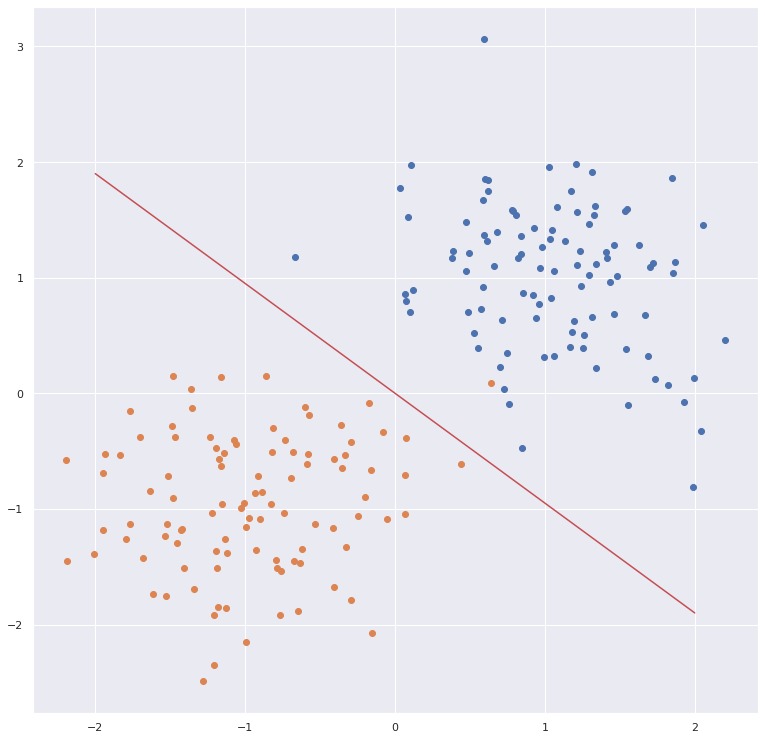

In [ ]:
# Изобразим разделяющую гиперплоскость согласно обученной модели
x_ = np.array([-2,2])
y_ = -lr.coef_[0][0]/lr.coef_[0][1]*x_ 

plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])
plt.plot(x_,y_, c='r')

Можно сделать то же самое и для SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear').fit(X, y)

In [ ]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

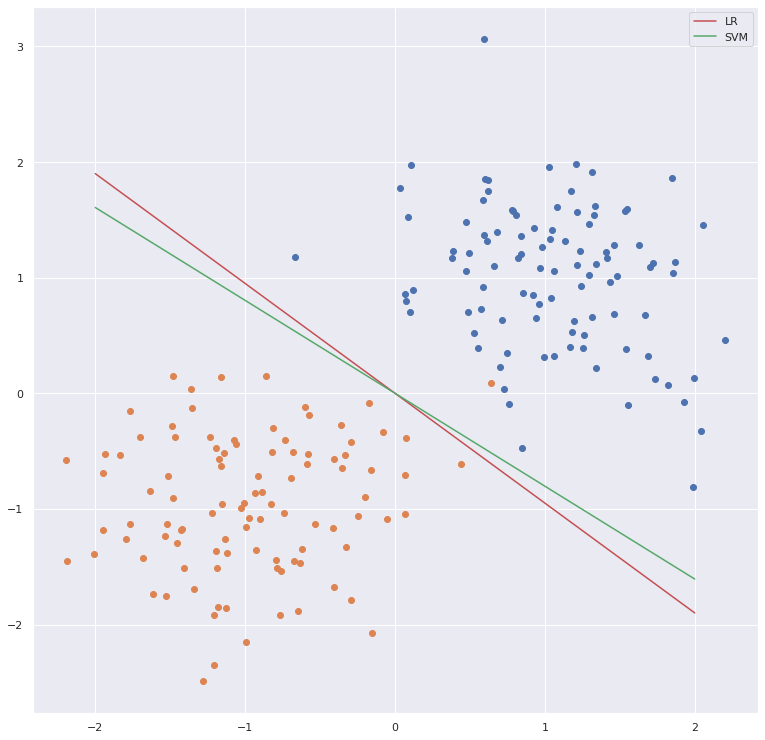

In [ ]:
x_ = np.array([-2,2])
y_lr = -lr.coef_[0][0]/lr.coef_[0][1]*x_ 
y_svm = -svm.coef_[0][0]/svm.coef_[0][1]*x_ 


fig, ax = plt.subplots(1,1, figsize=(13,13))
ax.scatter(class_1[:,0], class_1[:,1])
ax.scatter(class_2[:,0], class_2[:,1])
ax.plot(x_,y_lr, c='r', label='LR')
ax.plot(x_,y_svm, c='g', label='SVM')
legend_without_duplicate_labels(ax)
fig.show()

Видим, что LR и SVM отличаются друг от друга, хотя и не сильно. Видим также, что для SVM один из объектов лежит довольно близко к разделяющей гиперплоскости. Попробуем поизменять параметр C и проследить, как это повлияет на эту ситуацию

In [ ]:
from sklearn.svm import SVC
svm_1 = SVC(kernel='linear', C=0.1).fit(X, y)
svm_2 = SVC(kernel='linear', C=2.).fit(X, y)
svm_3 = SVC(kernel='linear', C=10.).fit(X, y)

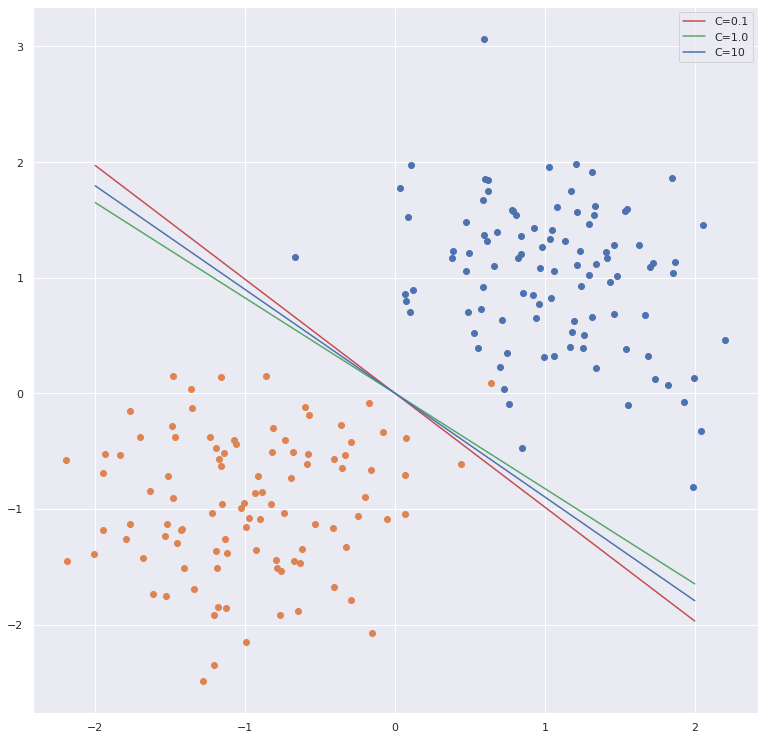

In [ ]:
y_svm_1 = -svm_1.coef_[0][0]/svm_1.coef_[0][1]*x_ 
y_svm_2 = -svm_2.coef_[0][0]/svm_2.coef_[0][1]*x_
y_svm_3 = -svm_3.coef_[0][0]/svm_3.coef_[0][1]*x_ 


fig, ax = plt.subplots(1,1, figsize=(13,13))
ax.scatter(class_1[:,0], class_1[:,1])
ax.scatter(class_2[:,0], class_2[:,1])
ax.plot(x_,y_svm_1, c='r', label='C=0.1')
ax.plot(x_,y_svm_2, c='g', label='C=1.0')
ax.plot(x_,y_svm_3, c='b', label='C=10')
legend_without_duplicate_labels(ax)
fig.show()

Видим иллюстрацию обозначенного выше факта:

Увеличение C приводит к отдалению разделяющей гиперплоскости от наиболее близких объектов.

# Немного об удобных инструментах sklearn

В `sklearn` существует удобный инструмент для оптимизации всего изложенного кода. Дело в том, что стандартная задача машинного обучения имеет довольно предсказуемый ход решения: применения ряда преобразований к данным, обучение некоторого классификатора, вычисление метрики качества. Для упрощеения этой процедуры разработан класс `Pipeline`.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X,y = load_wine(return_X_y=True)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

pipe = Pipeline(steps=[('transformer', StandardScaler()), ('classificator', LogisticRegression())])
pipe.fit(X_train, y_train)

pipe.score(x_test, y_test)

0.9814814814814815

В аргумент конструктора класса `Pipeline` необходимо передать последовательность шагов, которые будут выполнены с данными в виде пар (название_шага, объект_реализующий_этот_шаг).

При вызове функции `.fit()` все объекты в рамках `pipeline` будут автоматически обучены, а при вызовее функции `.predict()` данные пройдут всю цепочку преобразований и мы получим на выходе ответ последнего из преобразований.

Подробнее с этим классом можно ознакомиться [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

# Дополнительная литература

* Pattern Recognition and Machine Learning, chapter 4. C.Bishop
* CS229 Lecture notes, Part I, Andrew Ng.
* Айвазян С. А., Бухштабер В. М., Енюков И. С., Мешалкин Л. Д. Прикладная статистика: классификация и снижение размерности. — М.: Финансы и статистика, 1989.